# 🎯 Principal Component Analysis (PCA) in 2D - Visual Demonstration

## **Understanding PCA Through Interactive 2D Visualizations**

### **Main Goal:**
Learn how Principal Component Analysis (PCA) works by visualizing it step-by-step with 2D data, making the mathematical concepts intuitive and easy to understand.

### **Key Learning Objectives:**
- **Understand PCA Fundamentals**: Learn what principal components represent geometrically
- **Step-by-Step Implementation**: Build PCA from scratch to understand the mathematics
- **Visual Intuition**: See how PCA finds directions of maximum variance in data
- **Dimensionality Reduction**: Understand how PCA reduces dimensions while preserving information
- **Interactive Exploration**: Experiment with different data patterns and PCA parameters
- **Real-World Applications**: Apply PCA to actual datasets and interpret results

### **Why Start with 2D?**
2D data is perfect for learning PCA because:
- **Visual Clarity**: Easy to visualize data points and principal components
- **Mathematical Simplicity**: All calculations can be followed step-by-step
- **Geometric Intuition**: Principal components are simply directions (arrows) in the plane
- **Foundation Building**: Concepts learned here extend directly to higher dimensions

### **Interactive Features:**
🎮 Data pattern explorer | 📊 Live PCA computation | ⚡ Parameter adjustment | 🔬 Comparison dashboard

---

## 1. Import Required Libraries

We'll use NumPy for computations, Matplotlib for visualization, Scikit-learn for validation, and IPython widgets for interactivity.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris, make_blobs
import ipywidgets as widgets
from ipywidgets import interact, interactive, VBox, HBox
from IPython.display import display
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seeds for reproducibility
np.random.seed(42)

# Enable interactive plots
%matplotlib widget

print("Libraries imported successfully!")
print("Ready to explore PCA in 2D!")



Libraries imported successfully!
Ready to explore PCA in 2D!


## 2. Generate 2D Synthetic Datasets

Let's create various types of 2D datasets to understand how PCA behaves with different data patterns and correlation structures.

GENERATING 2D DATASETS
Generated 6 different 2D datasets
  Highly Correlated: 300 points
  Moderately Correlated: 300 points
  Diagonal Pattern: 300 points
  Circular Pattern: 300 points
  Uncorrelated (Different Variances): 300 points
  Weakly Correlated: 300 points


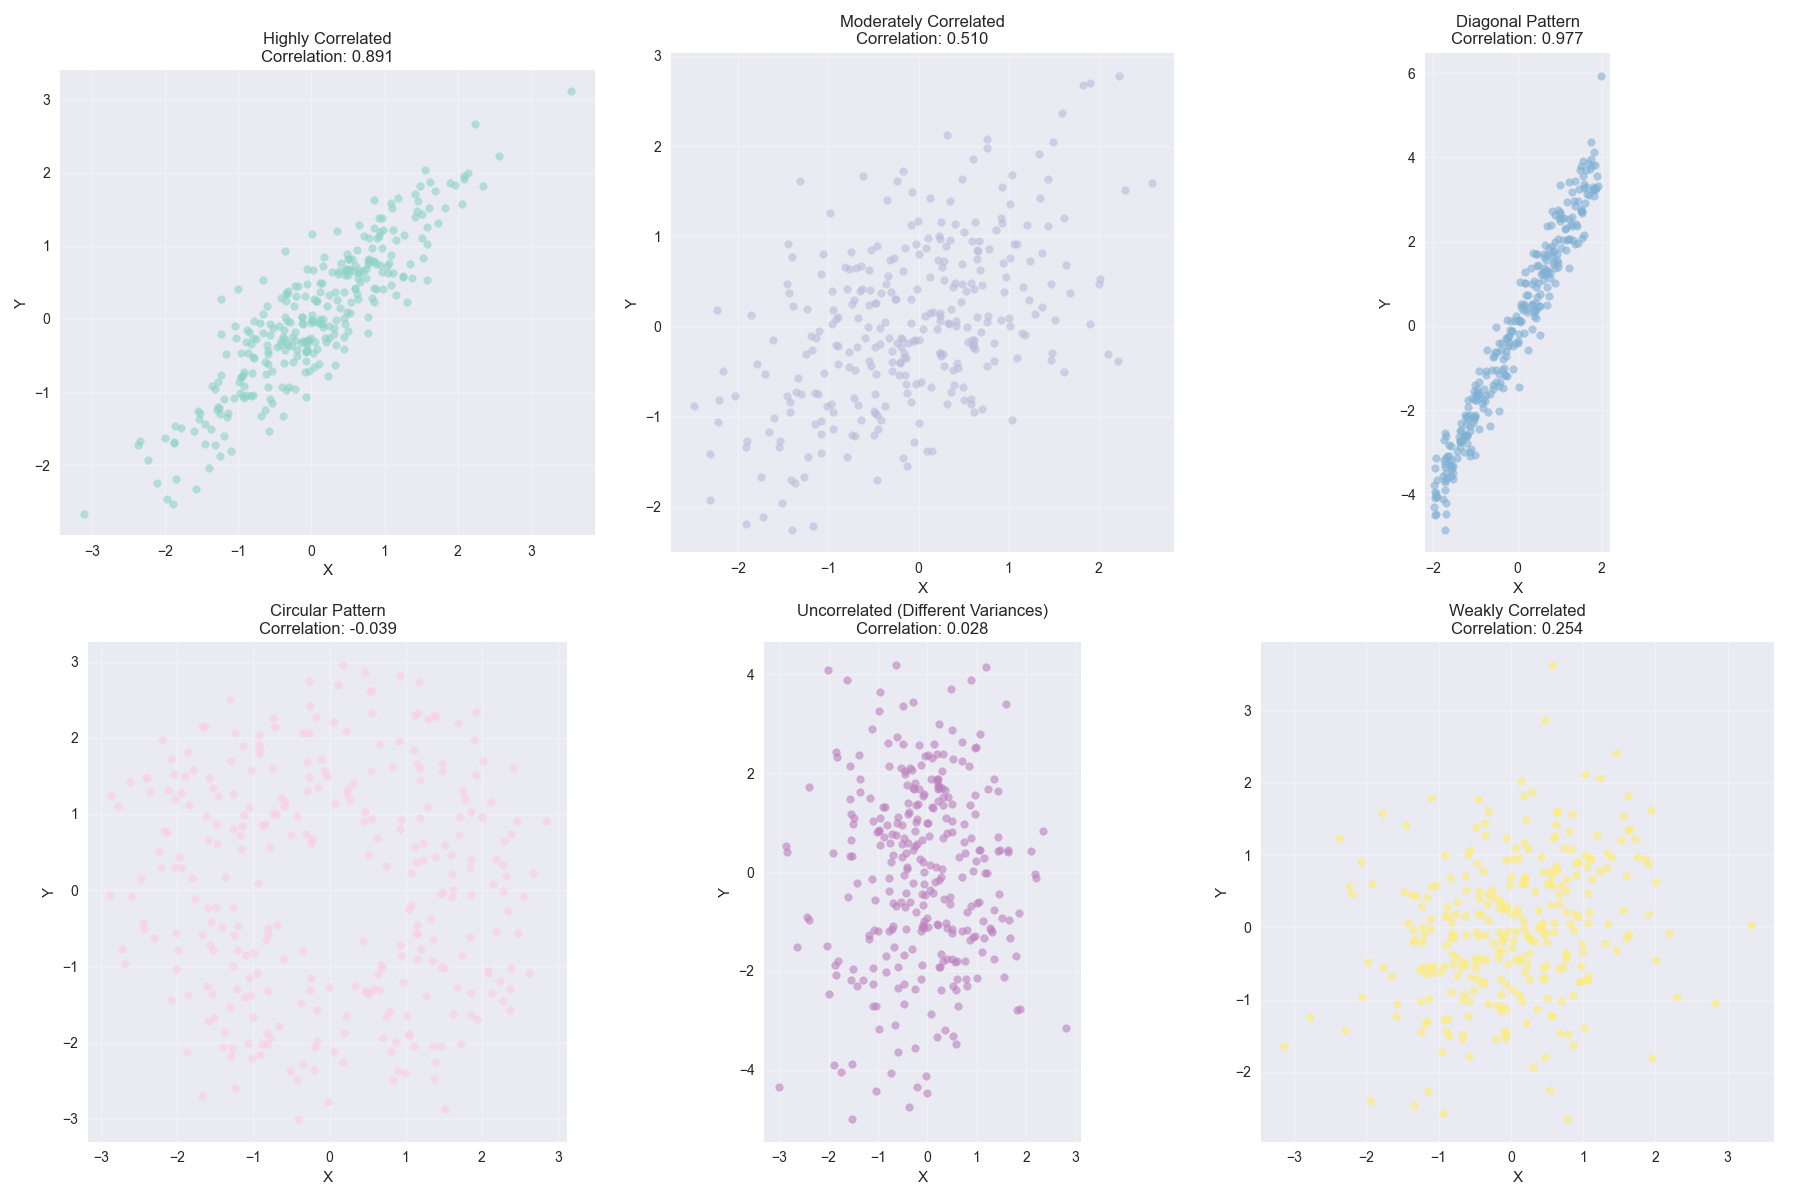


KEY OBSERVATIONS:
✅ Different datasets show various correlation patterns
📊 Correlation coefficient quantifies linear relationship
🎯 PCA will find different principal components for each pattern
🔍 Notice how data spreads differently in each case


In [4]:
def generate_correlated_data(n_samples=300, correlation=0.8, noise=0.1):
    """
    Generate 2D correlated Gaussian data
    
    Parameters:
    - n_samples: Number of data points
    - correlation: Correlation coefficient between x and y
    - noise: Amount of noise to add
    
    Returns:
    - X: 2D array of data points
    """
    # Create covariance matrix
    cov_matrix = np.array([[1, correlation], 
                          [correlation, 1]])
    
    # Generate data
    data = np.random.multivariate_normal([0, 0], cov_matrix, n_samples)
    
    # Add noise
    noise_data = np.random.normal(0, noise, data.shape)
    
    return data + noise_data

def generate_circular_data(n_samples=300, radius_range=(1, 3), noise=0.2):
    """
    Generate data points arranged in a circular pattern
    """
    angles = np.random.uniform(0, 2*np.pi, n_samples)
    radii = np.random.uniform(radius_range[0], radius_range[1], n_samples)
    
    x = radii * np.cos(angles) + np.random.normal(0, noise, n_samples)
    y = radii * np.sin(angles) + np.random.normal(0, noise, n_samples)
    
    return np.column_stack([x, y])

def generate_diagonal_data(n_samples=300, slope=2, spread=0.5):
    """
    Generate data along a diagonal line with some spread
    """
    x = np.random.uniform(-2, 2, n_samples)
    y = slope * x + np.random.normal(0, spread, n_samples)
    
    return np.column_stack([x, y])

def generate_uncorrelated_data(n_samples=300, x_std=1, y_std=2):
    """
    Generate uncorrelated data with different variances in x and y
    """
    x = np.random.normal(0, x_std, n_samples)
    y = np.random.normal(0, y_std, n_samples)
    
    return np.column_stack([x, y])

# Generate different types of datasets
print("GENERATING 2D DATASETS")
print("=" * 50)

datasets = {
    'Highly Correlated': generate_correlated_data(correlation=0.9),
    'Moderately Correlated': generate_correlated_data(correlation=0.6),
    'Diagonal Pattern': generate_diagonal_data(),
    'Circular Pattern': generate_circular_data(),
    'Uncorrelated (Different Variances)': generate_uncorrelated_data(),
    'Weakly Correlated': generate_correlated_data(correlation=0.3)
}

print(f"Generated {len(datasets)} different 2D datasets")
for name, data in datasets.items():
    print(f"  {name}: {data.shape[0]} points")

# Visualize all datasets
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

colors = plt.cm.Set3(np.linspace(0, 1, len(datasets)))

for i, (name, data) in enumerate(datasets.items()):
    ax = axes[i]
    
    # Plot data points
    ax.scatter(data[:, 0], data[:, 1], alpha=0.6, s=30, color=colors[i])
    
    # Calculate correlation coefficient
    correlation = np.corrcoef(data[:, 0], data[:, 1])[0, 1]
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'{name}\nCorrelation: {correlation:.3f}')
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

print("\nKEY OBSERVATIONS:")
print("✅ Different datasets show various correlation patterns")
print("📊 Correlation coefficient quantifies linear relationship")
print("🎯 PCA will find different principal components for each pattern")
print("🔍 Notice how data spreads differently in each case")

## 3. Implement PCA from Scratch

Let's build PCA step-by-step to understand exactly what happens mathematically. We'll implement each step clearly so you can see the process.

In [5]:
class PCA2D:
    """
    Principal Component Analysis implemented from scratch for 2D data
    """
    
    def __init__(self):
        self.mean_ = None
        self.components_ = None
        self.explained_variance_ratio_ = None
        self.eigenvalues_ = None
        self.eigenvectors_ = None
        
    def fit(self, X):
        """
        Fit PCA on 2D data
        
        Steps:
        1. Center the data (subtract mean)
        2. Compute covariance matrix
        3. Find eigenvalues and eigenvectors
        4. Sort by eigenvalues (descending)
        5. Store principal components
        """
        # Step 1: Center the data
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        
        print("STEP-BY-STEP PCA COMPUTATION")
        print("=" * 40)
        print(f"Step 1: Center the data")
        print(f"  Original data mean: [{self.mean_[0]:.3f}, {self.mean_[1]:.3f}]")
        print(f"  Centered data mean: [{np.mean(X_centered, axis=0)[0]:.3f}, {np.mean(X_centered, axis=0)[1]:.3f}]")
        
        # Step 2: Compute covariance matrix
        n_samples = X.shape[0]
        cov_matrix = np.cov(X_centered.T)
        
        print(f"\nStep 2: Compute covariance matrix")
        print(f"  Covariance matrix:")
        print(f"    [[{cov_matrix[0,0]:.3f}, {cov_matrix[0,1]:.3f}]")
        print(f"     [{cov_matrix[1,0]:.3f}, {cov_matrix[1,1]:.3f}]]")
        
        # Step 3: Find eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        print(f"\nStep 3: Compute eigenvalues and eigenvectors")
        print(f"  Eigenvalues: [{eigenvalues[0]:.3f}, {eigenvalues[1]:.3f}]")
        print(f"  Eigenvector 1: [{eigenvectors[:, 0][0]:.3f}, {eigenvectors[:, 0][1]:.3f}]")
        print(f"  Eigenvector 2: [{eigenvectors[:, 1][0]:.3f}, {eigenvectors[:, 1][1]:.3f}]")
        
        # Step 4: Sort by eigenvalues (descending)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        print(f"\nStep 4: Sort by eigenvalues (descending)")
        print(f"  First PC (largest eigenvalue): {eigenvalues[0]:.3f}")
        print(f"  Second PC (smallest eigenvalue): {eigenvalues[1]:.3f}")
        
        # Step 5: Store results
        self.eigenvalues_ = eigenvalues
        self.eigenvectors_ = eigenvectors
        self.components_ = eigenvectors.T
        
        # Calculate explained variance ratio
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues / total_variance
        
        print(f"\nStep 5: Calculate explained variance")
        print(f"  PC1 explains {self.explained_variance_ratio_[0]:.1%} of variance")
        print(f"  PC2 explains {self.explained_variance_ratio_[1]:.1%} of variance")
        print(f"  Total variance explained: {np.sum(self.explained_variance_ratio_):.1%}")
        
        return self
    
    def transform(self, X):
        """
        Transform data to principal component space
        """
        X_centered = X - self.mean_
        return X_centered @ self.eigenvectors_
    
    def fit_transform(self, X):
        """
        Fit PCA and transform data
        """
        return self.fit(X).transform(X)
    
    def inverse_transform(self, X_pca):
        """
        Transform data back from PCA space to original space
        """
        return X_pca @ self.eigenvectors_.T + self.mean_

# Test PCA implementation with highly correlated data
test_data = datasets['Highly Correlated']
print("TESTING PCA IMPLEMENTATION")
print("=" * 50)
print(f"Testing with: {test_data.shape[0]} data points")

# Apply our PCA implementation
pca_manual = PCA2D()
pca_manual.fit(test_data)

# Transform data to PCA space
transformed_data = pca_manual.transform(test_data)

print(f"\nTransformed data shape: {transformed_data.shape}")
print(f"First few transformed points:")
for i in range(3):
    print(f"  Point {i+1}: [{transformed_data[i, 0]:.3f}, {transformed_data[i, 1]:.3f}]")

print("\n✅ PCA implementation completed successfully!")

TESTING PCA IMPLEMENTATION
Testing with: 300 data points
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [0.025, 0.014]
  Centered data mean: [-0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[0.990, 0.870]
     [0.870, 0.962]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [0.106, 1.846]
  Eigenvector 1: [0.701, -0.713]
  Eigenvector 2: [-0.713, -0.701]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 1.846
  Second PC (smallest eigenvalue): 0.106

Step 5: Calculate explained variance
  PC1 explains 94.6% of variance
  PC2 explains 5.4% of variance
  Total variance explained: 100.0%

Transformed data shape: (300, 2)
First few transformed points:
  Point 1: [0.723, 0.161]
  Point 2: [0.767, -0.517]
  Point 3: [-0.457, -0.041]

✅ PCA implementation completed successfully!


## 4. Visualize Data and Principal Components

Let's create comprehensive visualizations to see how PCA identifies the main directions of variation in 2D data.

PCA ANALYSIS FOR DIFFERENT DATA PATTERNS
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [0.025, 0.014]
  Centered data mean: [-0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[0.990, 0.870]
     [0.870, 0.962]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [0.106, 1.846]
  Eigenvector 1: [0.701, -0.713]
  Eigenvector 2: [-0.713, -0.701]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 1.846
  Second PC (smallest eigenvalue): 0.106

Step 5: Calculate explained variance
  PC1 explains 94.6% of variance
  PC2 explains 5.4% of variance
  Total variance explained: 100.0%


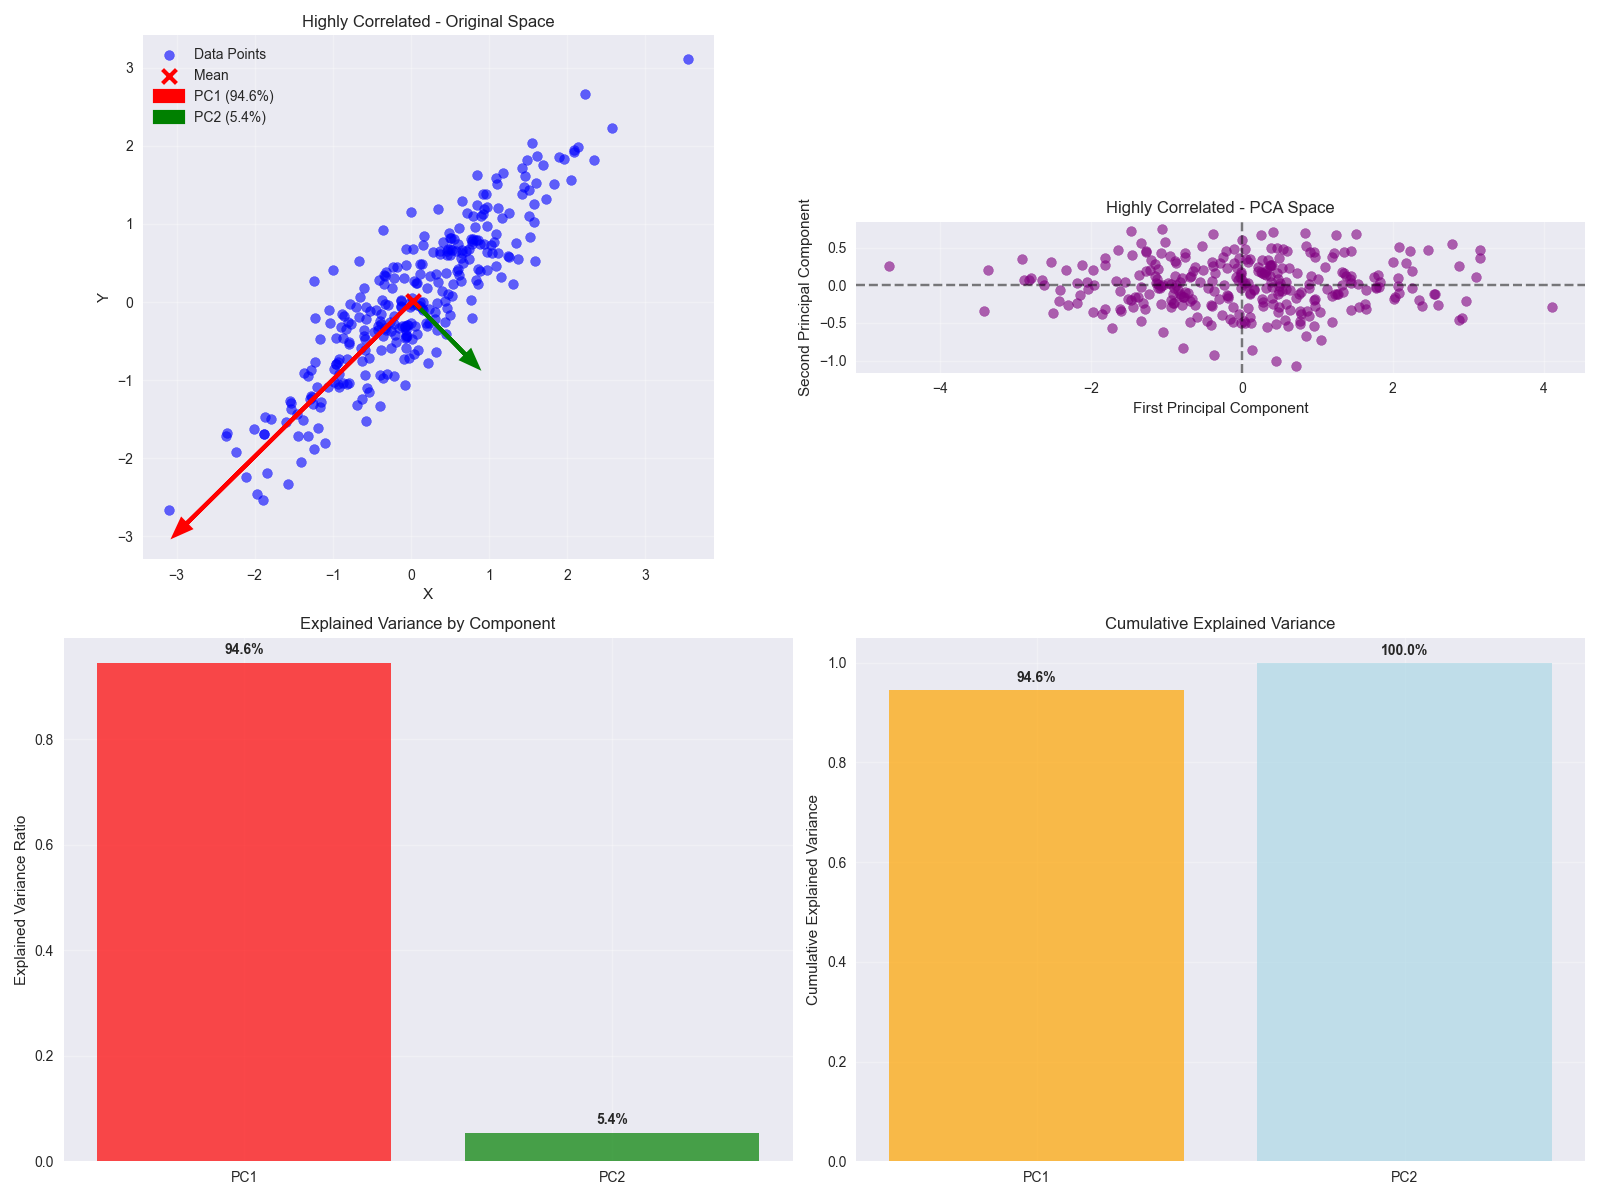


DETAILED PCA ANALYSIS - Highly Correlated
Principal Component 1:
  Direction: [-0.713, -0.701]
  Eigenvalue: 1.846
  Explained Variance: 94.6%

Principal Component 2:
  Direction: [0.701, -0.713]
  Eigenvalue: 0.106
  Explained Variance: 5.4%

Orthogonality Check:
  Dot product of PC1 and PC2: 0.000000
  ✅ Orthogonal!

--------------------------------------------------

STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [0.004, 0.038]
  Centered data mean: [-0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[2.092, -0.084]
     [-0.084, 2.157]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [2.035, 2.214]
  Eigenvector 1: [-0.825, -0.565]
  Eigenvector 2: [-0.565, 0.825]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 2.214
  Second PC (smallest eigenvalue): 2.035

Step 5: Calculate explained variance
  PC1 explains 52.1% of variance
  PC2 explains 47.9% of variance
  Total variance explained: 1

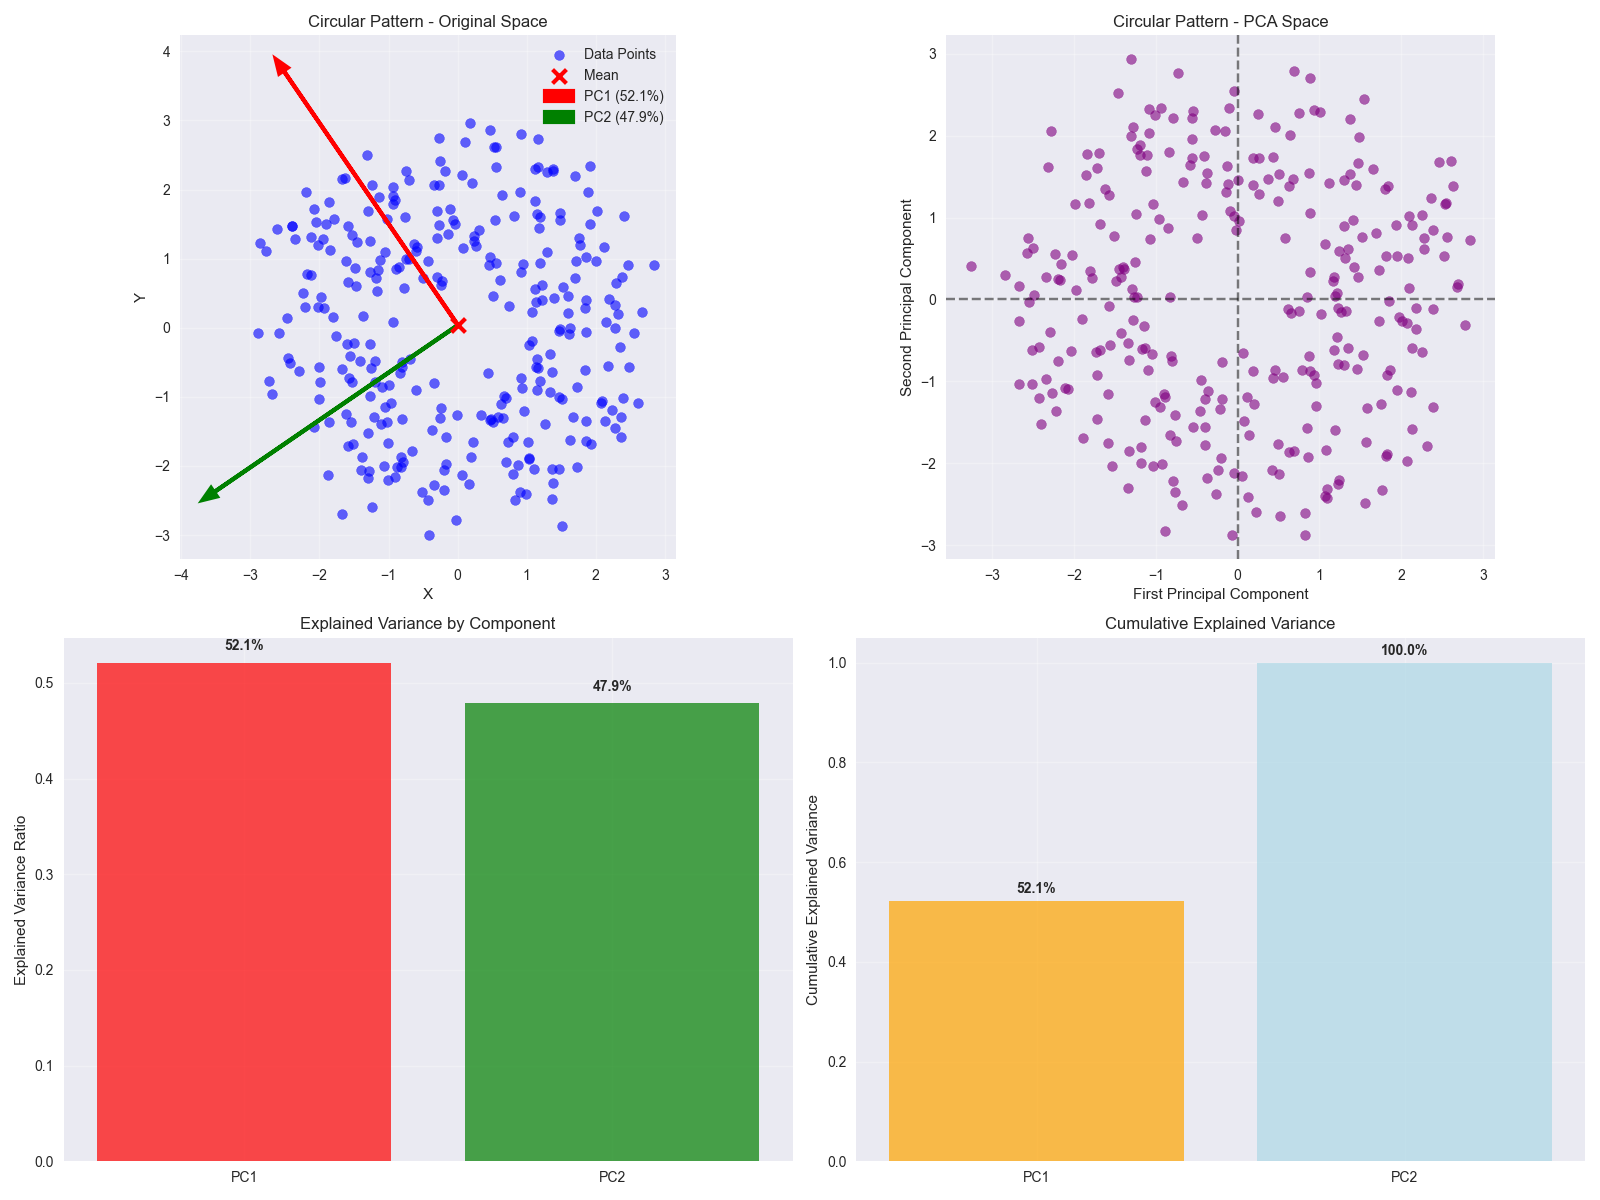


DETAILED PCA ANALYSIS - Circular Pattern
Principal Component 1:
  Direction: [-0.565, 0.825]
  Eigenvalue: 2.214
  Explained Variance: 52.1%

Principal Component 2:
  Direction: [-0.825, -0.565]
  Eigenvalue: 2.035
  Explained Variance: 47.9%

Orthogonality Check:
  Dot product of PC1 and PC2: -0.000000
  ✅ Orthogonal!

--------------------------------------------------

STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [-0.095, -0.042]
  Centered data mean: [-0.000, 0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[1.013, 0.054]
     [0.054, 3.556]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [1.012, 3.557]
  Eigenvector 1: [-1.000, 0.021]
  Eigenvector 2: [0.021, 1.000]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 3.557
  Second PC (smallest eigenvalue): 1.012

Step 5: Calculate explained variance
  PC1 explains 77.9% of variance
  PC2 explains 22.1% of variance
  Total variance explained: 100

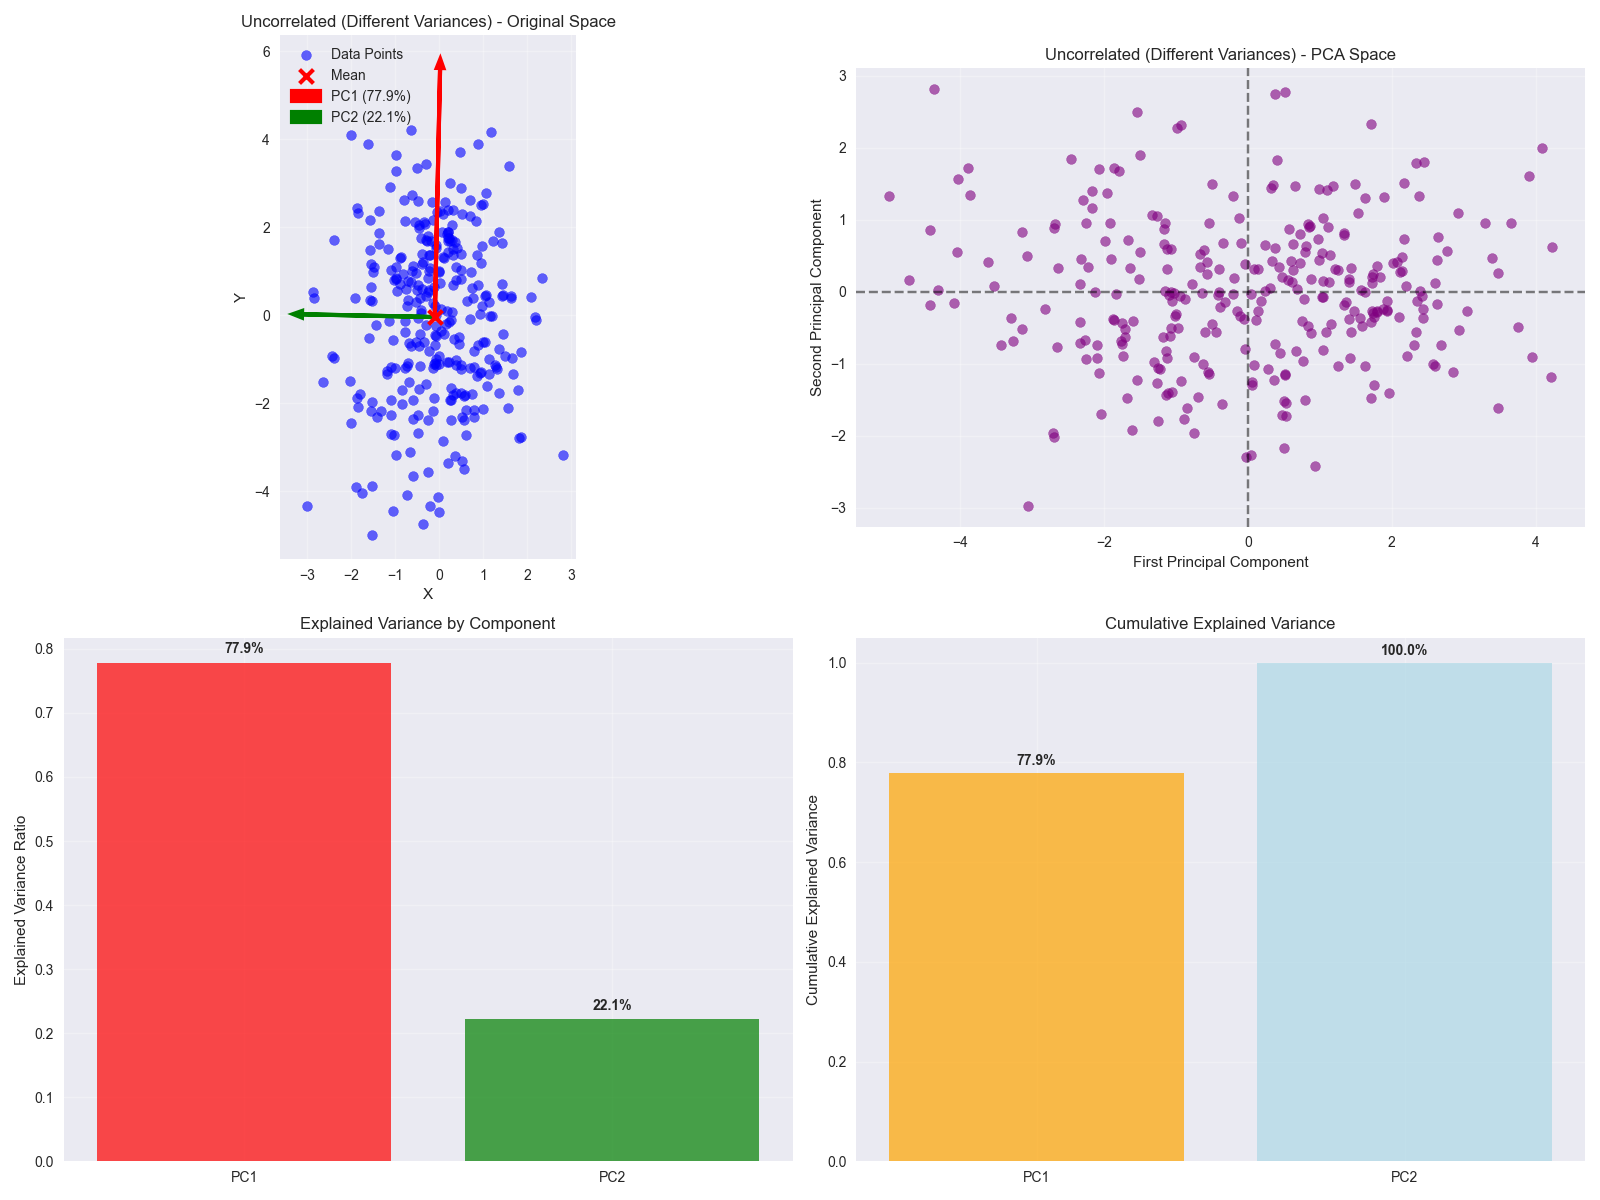


DETAILED PCA ANALYSIS - Uncorrelated (Different Variances)
Principal Component 1:
  Direction: [0.021, 1.000]
  Eigenvalue: 3.557
  Explained Variance: 77.9%

Principal Component 2:
  Direction: [-1.000, 0.021]
  Eigenvalue: 1.012
  Explained Variance: 22.1%

Orthogonality Check:
  Dot product of PC1 and PC2: -0.000000
  ✅ Orthogonal!

--------------------------------------------------



In [6]:
def plot_pca_analysis(X, pca_fitted, title="PCA Analysis"):
    """
    Create comprehensive PCA visualization
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))
    
    # 1. Original data with principal components
    ax1.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50, color='blue', label='Data Points')
    
    # Plot mean point
    mean_point = pca_fitted.mean_
    ax1.scatter(mean_point[0], mean_point[1], color='red', s=100, marker='x', 
               linewidth=3, label='Mean', zorder=5)
    
    # Plot principal component vectors
    scale_factor = 3  # Scale arrows for visibility
    
    # First principal component (red arrow)
    pc1 = pca_fitted.eigenvectors_[:, 0] * np.sqrt(pca_fitted.eigenvalues_[0]) * scale_factor
    ax1.arrow(mean_point[0], mean_point[1], pc1[0], pc1[1],
              head_width=0.15, head_length=0.2, fc='red', ec='red', linewidth=3,
              label=f'PC1 ({pca_fitted.explained_variance_ratio_[0]:.1%})')
    
    # Second principal component (green arrow)
    pc2 = pca_fitted.eigenvectors_[:, 1] * np.sqrt(pca_fitted.eigenvalues_[1]) * scale_factor
    ax1.arrow(mean_point[0], mean_point[1], pc2[0], pc2[1],
              head_width=0.15, head_length=0.2, fc='green', ec='green', linewidth=3,
              label=f'PC2 ({pca_fitted.explained_variance_ratio_[1]:.1%})')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title(f'{title} - Original Space')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal', adjustable='box')
    
    # 2. Transformed data (PCA space)
    X_transformed = pca_fitted.transform(X)
    ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.6, s=50, color='purple')
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    
    ax2.set_xlabel('First Principal Component')
    ax2.set_ylabel('Second Principal Component')
    ax2.set_title(f'{title} - PCA Space')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal', adjustable='box')
    
    # 3. Explained variance
    variance_ratios = pca_fitted.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratios)
    
    components = ['PC1', 'PC2']
    ax3.bar(components, variance_ratios, alpha=0.7, color=['red', 'green'])
    ax3.set_ylabel('Explained Variance Ratio')
    ax3.set_title('Explained Variance by Component')
    ax3.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(variance_ratios):
        ax3.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Cumulative explained variance
    ax4.bar(components, cumulative_variance, alpha=0.7, color=['orange', 'lightblue'])
    ax4.set_ylabel('Cumulative Explained Variance')
    ax4.set_title('Cumulative Explained Variance')
    ax4.grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(cumulative_variance):
        ax4.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nDETAILED PCA ANALYSIS - {title}")
    print("=" * 50)
    print(f"Principal Component 1:")
    print(f"  Direction: [{pca_fitted.eigenvectors_[:, 0][0]:.3f}, {pca_fitted.eigenvectors_[:, 0][1]:.3f}]")
    print(f"  Eigenvalue: {pca_fitted.eigenvalues_[0]:.3f}")
    print(f"  Explained Variance: {pca_fitted.explained_variance_ratio_[0]:.1%}")
    
    print(f"\nPrincipal Component 2:")
    print(f"  Direction: [{pca_fitted.eigenvectors_[:, 1][0]:.3f}, {pca_fitted.eigenvectors_[:, 1][1]:.3f}]")
    print(f"  Eigenvalue: {pca_fitted.eigenvalues_[1]:.3f}")
    print(f"  Explained Variance: {pca_fitted.explained_variance_ratio_[1]:.1%}")
    
    # Check orthogonality
    dot_product = np.dot(pca_fitted.eigenvectors_[:, 0], pca_fitted.eigenvectors_[:, 1])
    print(f"\nOrthogonality Check:")
    print(f"  Dot product of PC1 and PC2: {dot_product:.6f}")
    print(f"  {'✅ Orthogonal!' if abs(dot_product) < 1e-10 else '❌ Not orthogonal!'}")

# Apply PCA to different datasets
print("PCA ANALYSIS FOR DIFFERENT DATA PATTERNS")
print("=" * 60)

# Analyze a few interesting datasets
datasets_to_analyze = ['Highly Correlated', 'Circular Pattern', 'Uncorrelated (Different Variances)']

for dataset_name in datasets_to_analyze:
    data = datasets[dataset_name]
    pca = PCA2D()
    pca.fit(data)
    plot_pca_analysis(data, pca, dataset_name)
    print("\n" + "-"*50 + "\n")

## 5. Compare Manual PCA with Scikit-learn

Let's validate our implementation by comparing results with Scikit-learn's PCA to ensure our manual implementation is correct.

COMPARING PCA IMPLEMENTATIONS - Highly Correlated
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [0.025, 0.014]
  Centered data mean: [-0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[0.990, 0.870]
     [0.870, 0.962]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [0.106, 1.846]
  Eigenvector 1: [0.701, -0.713]
  Eigenvector 2: [-0.713, -0.701]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 1.846
  Second PC (smallest eigenvalue): 0.106

Step 5: Calculate explained variance
  PC1 explains 94.6% of variance
  PC2 explains 5.4% of variance
  Total variance explained: 100.0%
COMPARISON RESULTS:
------------------------------
Explained Variance Ratios:
  Manual PCA:    [0.945614, 0.054386]
  Scikit-learn:  [0.945614, 0.054386]
  Difference:    [0.00000000, 0.00000000]

Principal Components:
  Manual PC1:    [-0.712877, -0.701289]
  Scikit PC1:    [0.712877, 0.701289]
  Manual PC2:    [0.7012

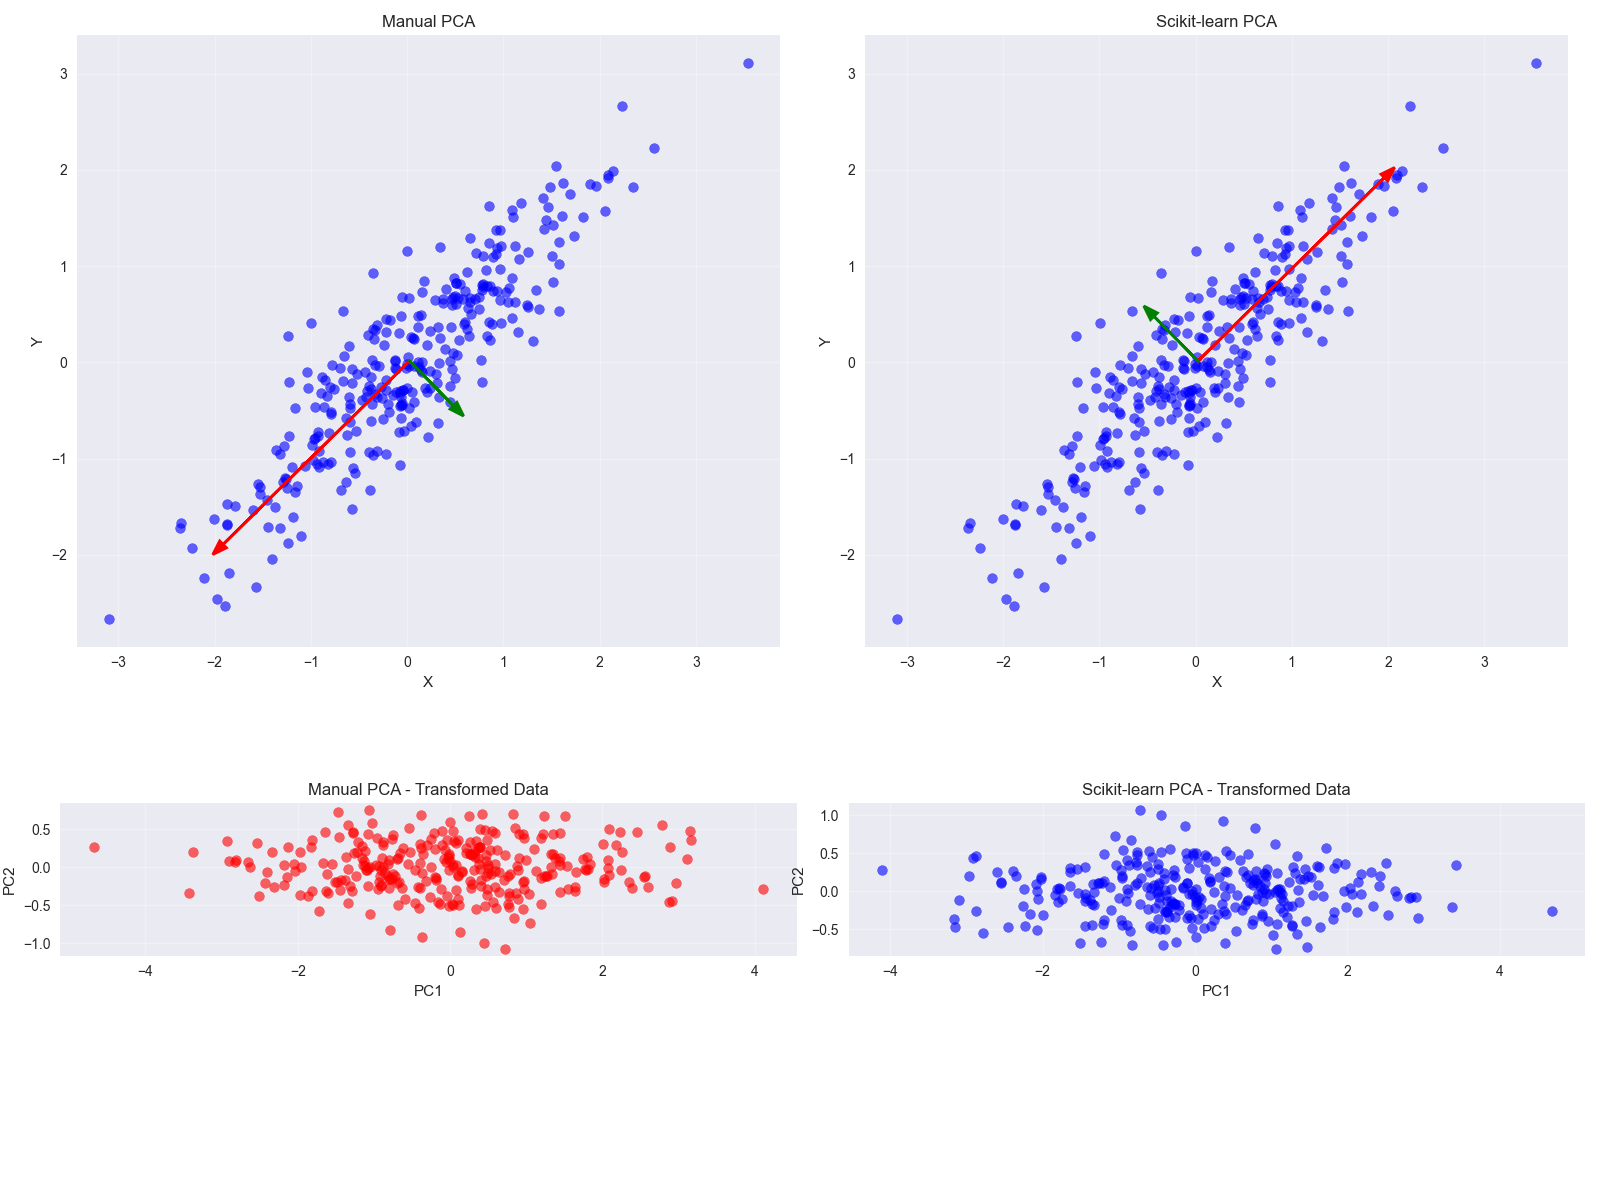



COMPARING PCA IMPLEMENTATIONS - Diagonal Pattern
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [-0.059, -0.118]
  Centered data mean: [-0.000, 0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[1.280, 2.595]
     [2.595, 5.509]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [0.047, 6.743]
  Eigenvector 1: [-0.903, 0.429]
  Eigenvector 2: [0.429, 0.903]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 6.743
  Second PC (smallest eigenvalue): 0.047

Step 5: Calculate explained variance
  PC1 explains 99.3% of variance
  PC2 explains 0.7% of variance
  Total variance explained: 100.0%
COMPARISON RESULTS:
------------------------------
Explained Variance Ratios:
  Manual PCA:    [0.993122, 0.006878]
  Scikit-learn:  [0.993122, 0.006878]
  Difference:    [0.00000000, 0.00000000]

Principal Components:
  Manual PC1:    [0.429140, 0.903238]
  Scikit PC1:    [0.429140, 0.903238]
  Manual PC2:    [-0.90323

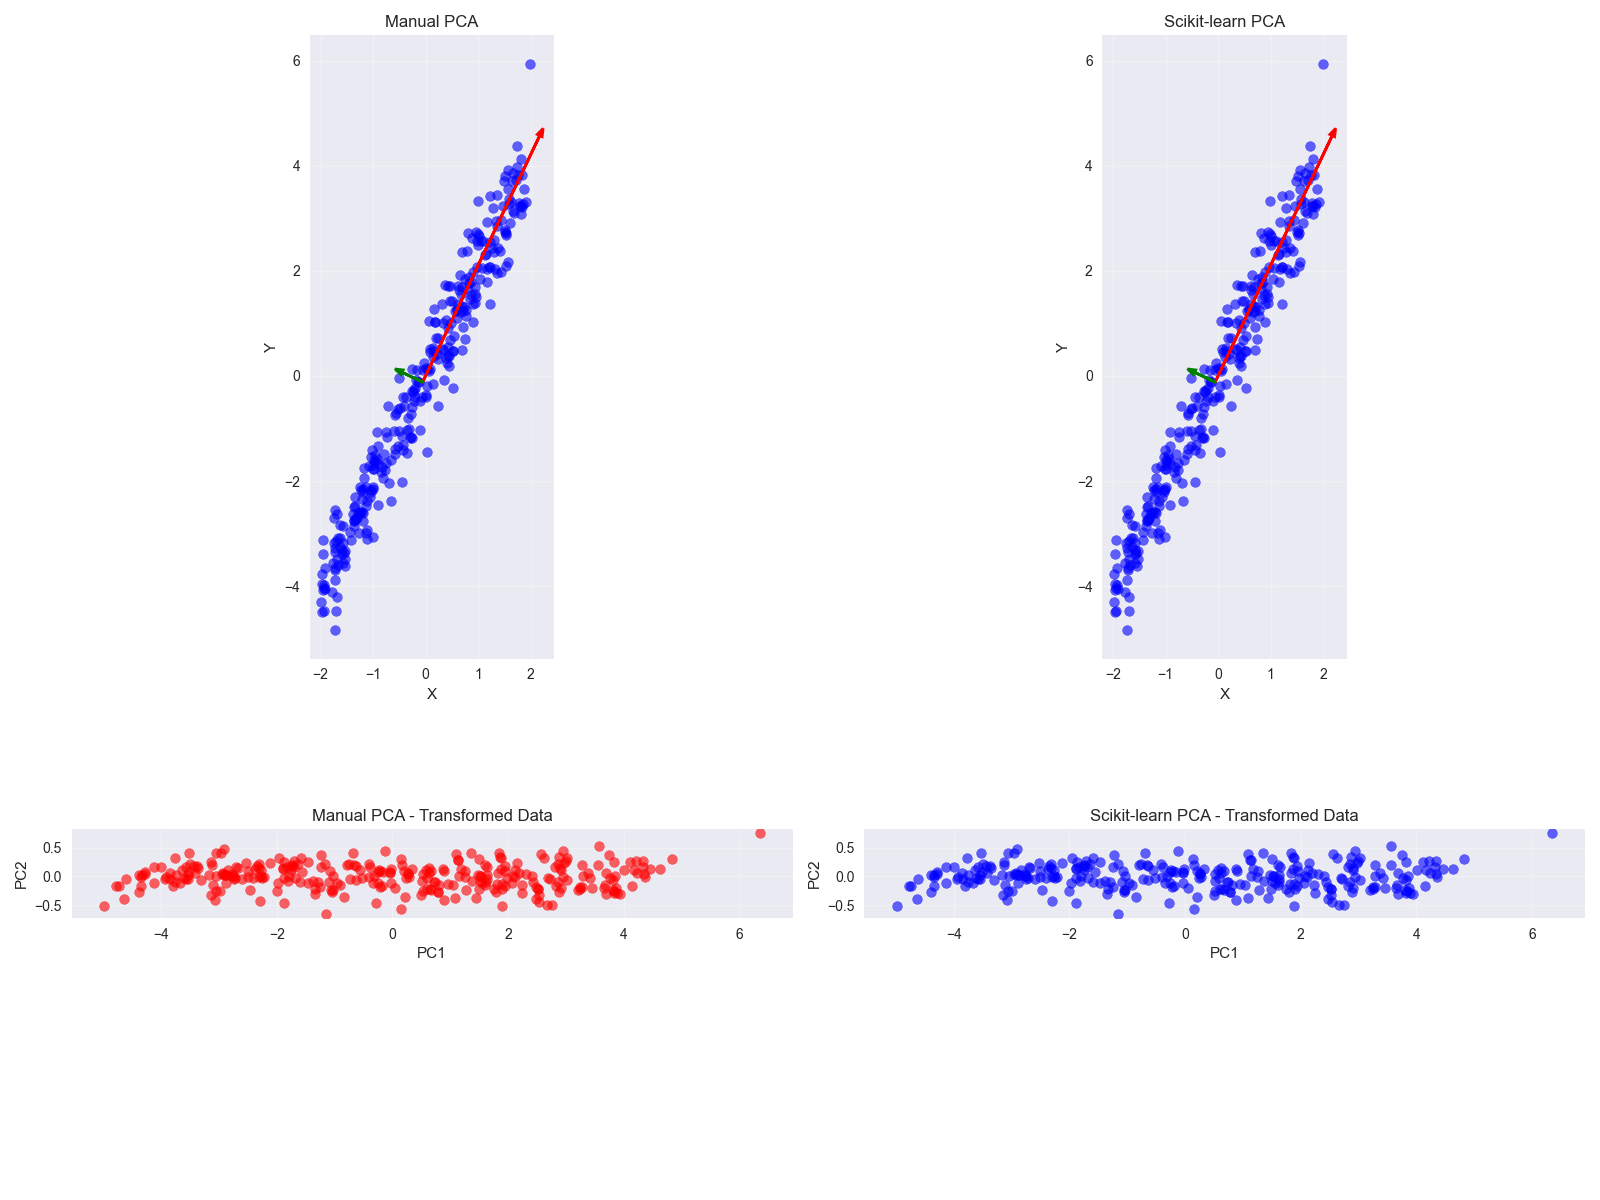



COMPARING PCA IMPLEMENTATIONS - Uncorrelated (Different Variances)
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [-0.095, -0.042]
  Centered data mean: [-0.000, 0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[1.013, 0.054]
     [0.054, 3.556]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [1.012, 3.557]
  Eigenvector 1: [-1.000, 0.021]
  Eigenvector 2: [0.021, 1.000]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 3.557
  Second PC (smallest eigenvalue): 1.012

Step 5: Calculate explained variance
  PC1 explains 77.9% of variance
  PC2 explains 22.1% of variance
  Total variance explained: 100.0%
COMPARISON RESULTS:
------------------------------
Explained Variance Ratios:
  Manual PCA:    [0.778582, 0.221418]
  Scikit-learn:  [0.778582, 0.221418]
  Difference:    [0.00000000, 0.00000000]

Principal Components:
  Manual PC1:    [0.021110, 0.999777]
  Scikit PC1:    [-0.021110, -0.999777]
  Man

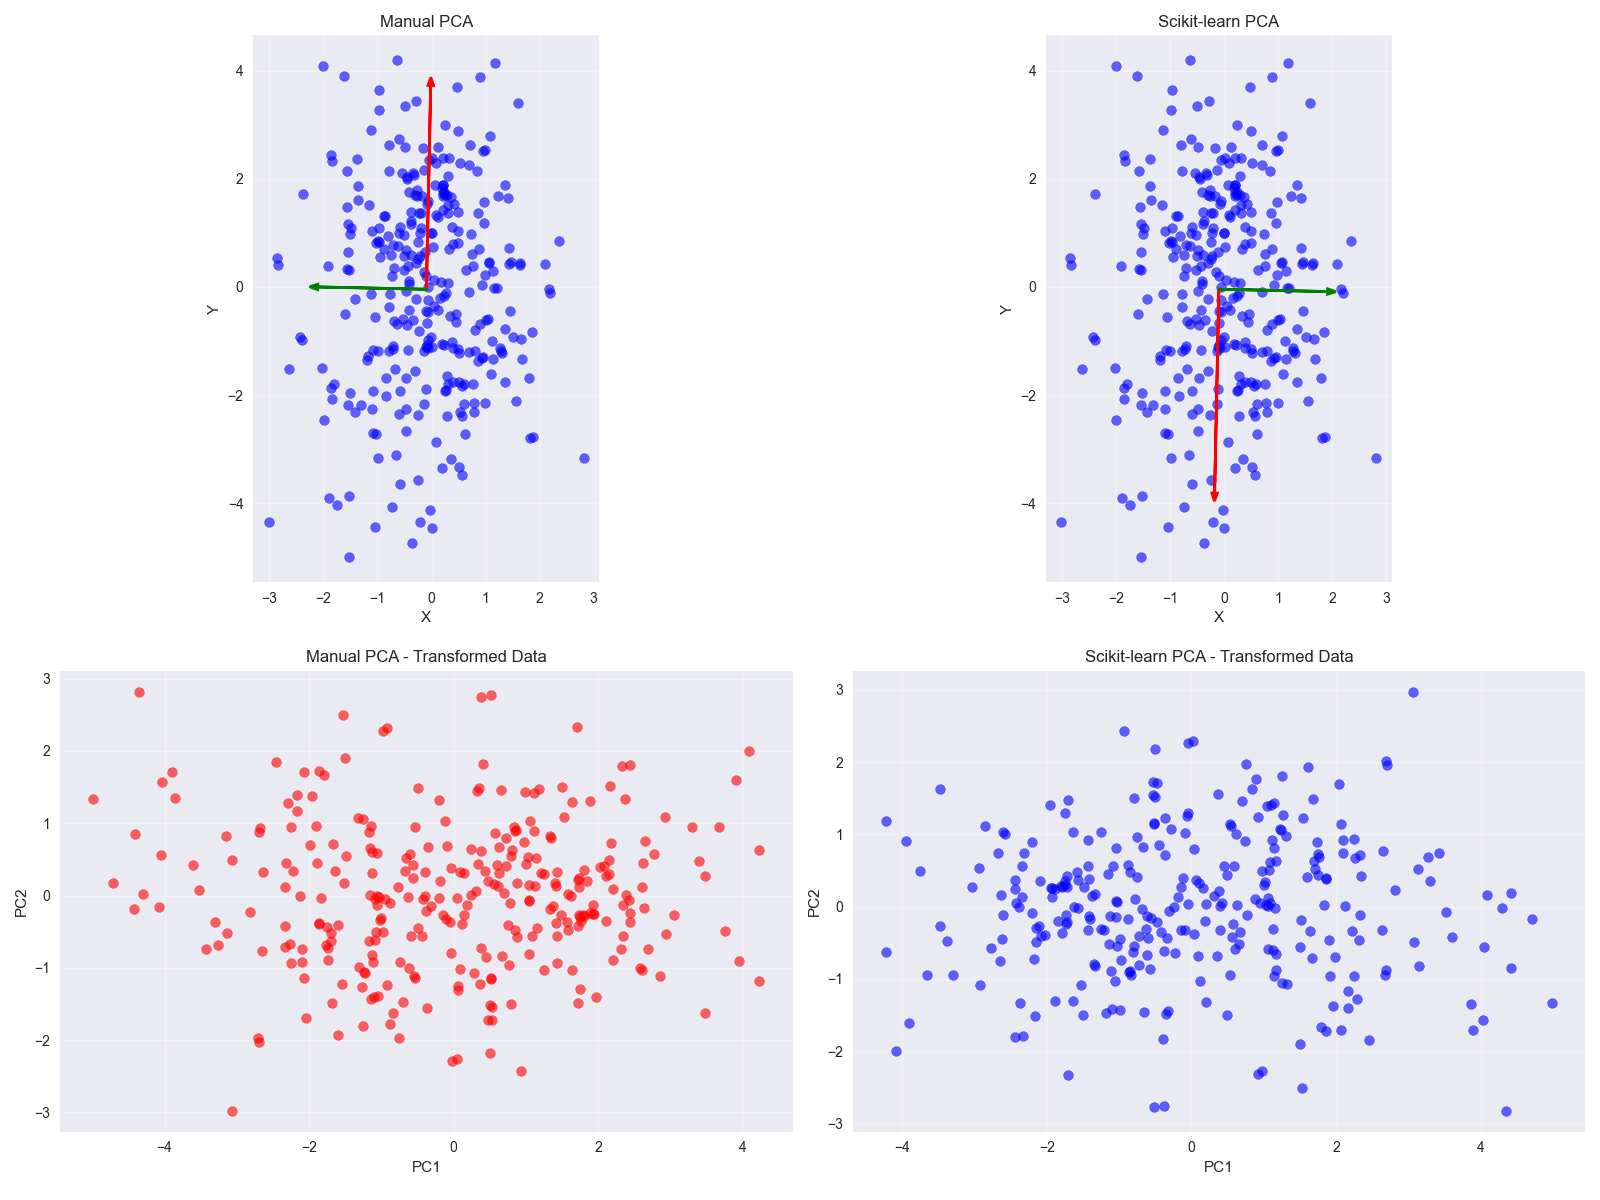



FINAL VALIDATION RESULT:
🎉 SUCCESS! Our manual PCA implementation matches scikit-learn perfectly!
✅ All eigenvalues, eigenvectors, and transformations are consistent


In [7]:
def compare_pca_implementations(X, dataset_name):
    """
    Compare our manual PCA with scikit-learn's PCA
    """
    print(f"COMPARING PCA IMPLEMENTATIONS - {dataset_name}")
    print("=" * 60)
    
    # Our manual implementation
    pca_manual = PCA2D()
    pca_manual.fit(X)
    
    # Scikit-learn implementation
    pca_sklearn = PCA(n_components=2)
    pca_sklearn.fit(X)
    
    print("COMPARISON RESULTS:")
    print("-" * 30)
    
    # Compare explained variance ratios
    manual_variance = pca_manual.explained_variance_ratio_
    sklearn_variance = pca_sklearn.explained_variance_ratio_
    
    print(f"Explained Variance Ratios:")
    print(f"  Manual PCA:    [{manual_variance[0]:.6f}, {manual_variance[1]:.6f}]")
    print(f"  Scikit-learn:  [{sklearn_variance[0]:.6f}, {sklearn_variance[1]:.6f}]")
    print(f"  Difference:    [{abs(manual_variance[0] - sklearn_variance[0]):.8f}, {abs(manual_variance[1] - sklearn_variance[1]):.8f}]")
    
    # Compare principal components (note: sign might be flipped)
    manual_components = pca_manual.components_
    sklearn_components = pca_sklearn.components_
    
    print(f"\nPrincipal Components:")
    print(f"  Manual PC1:    [{manual_components[0, 0]:.6f}, {manual_components[0, 1]:.6f}]")
    print(f"  Scikit PC1:    [{sklearn_components[0, 0]:.6f}, {sklearn_components[0, 1]:.6f}]")
    print(f"  Manual PC2:    [{manual_components[1, 0]:.6f}, {manual_components[1, 1]:.6f}]")
    print(f"  Scikit PC2:    [{sklearn_components[1, 0]:.6f}, {sklearn_components[1, 1]:.6f}]")
    
    # Check if components are the same or flipped
    pc1_same = np.allclose(manual_components[0], sklearn_components[0], atol=1e-6)
    pc1_flipped = np.allclose(manual_components[0], -sklearn_components[0], atol=1e-6)
    pc2_same = np.allclose(manual_components[1], sklearn_components[1], atol=1e-6)
    pc2_flipped = np.allclose(manual_components[1], -sklearn_components[1], atol=1e-6)
    
    print(f"\nComponent Direction Analysis:")
    print(f"  PC1: {'✅ Same direction' if pc1_same else ('✅ Opposite direction (equivalent)' if pc1_flipped else '❌ Different')}")
    print(f"  PC2: {'✅ Same direction' if pc2_same else ('✅ Opposite direction (equivalent)' if pc2_flipped else '❌ Different')}")
    
    # Transform data with both methods
    manual_transformed = pca_manual.transform(X)
    sklearn_transformed = pca_sklearn.transform(X)
    
    # Check if transformations are consistent (allowing for sign flips)
    transform_diff = np.abs(manual_transformed - sklearn_transformed)
    transform_diff_flipped = np.abs(manual_transformed + sklearn_transformed)
    
    max_diff = np.min([np.max(transform_diff), np.max(transform_diff_flipped)])
    
    print(f"\nTransformation Consistency:")
    print(f"  Maximum difference in transformed coordinates: {max_diff:.8f}")
    print(f"  {'✅ Transformations match!' if max_diff < 1e-6 else '❌ Transformations differ'}")
    
    # Visual comparison
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))
    
    # Manual PCA visualization
    ax1.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50, color='blue')
    mean_point = pca_manual.mean_
    
    # Plot principal components
    scale_factor = 2
    pc1 = pca_manual.eigenvectors_[:, 0] * np.sqrt(pca_manual.eigenvalues_[0]) * scale_factor
    pc2 = pca_manual.eigenvectors_[:, 1] * np.sqrt(pca_manual.eigenvalues_[1]) * scale_factor
    
    ax1.arrow(mean_point[0], mean_point[1], pc1[0], pc1[1],
              head_width=0.1, head_length=0.15, fc='red', ec='red', linewidth=2)
    ax1.arrow(mean_point[0], mean_point[1], pc2[0], pc2[1],
              head_width=0.1, head_length=0.15, fc='green', ec='green', linewidth=2)
    
    ax1.set_title('Manual PCA')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # Scikit-learn PCA visualization
    ax2.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50, color='blue')
    sklearn_mean = np.mean(X, axis=0)
    
    pc1_sklearn = sklearn_components[0] * np.sqrt(pca_sklearn.explained_variance_[0]) * scale_factor
    pc2_sklearn = sklearn_components[1] * np.sqrt(pca_sklearn.explained_variance_[1]) * scale_factor
    
    ax2.arrow(sklearn_mean[0], sklearn_mean[1], pc1_sklearn[0], pc1_sklearn[1],
              head_width=0.1, head_length=0.15, fc='red', ec='red', linewidth=2)
    ax2.arrow(sklearn_mean[0], sklearn_mean[1], pc2_sklearn[0], pc2_sklearn[1],
              head_width=0.1, head_length=0.15, fc='green', ec='green', linewidth=2)
    
    ax2.set_title('Scikit-learn PCA')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    # Transformed data comparison
    ax3.scatter(manual_transformed[:, 0], manual_transformed[:, 1], 
               alpha=0.6, s=50, color='red', label='Manual PCA')
    ax3.set_title('Manual PCA - Transformed Data')
    ax3.set_xlabel('PC1')
    ax3.set_ylabel('PC2')
    ax3.grid(True, alpha=0.3)
    ax3.set_aspect('equal')
    
    ax4.scatter(sklearn_transformed[:, 0], sklearn_transformed[:, 1], 
               alpha=0.6, s=50, color='blue', label='Scikit-learn PCA')
    ax4.set_title('Scikit-learn PCA - Transformed Data')
    ax4.set_xlabel('PC1')
    ax4.set_ylabel('PC2')
    ax4.grid(True, alpha=0.3)
    ax4.set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    return max_diff < 1e-6

# Test comparison on different datasets
test_datasets = ['Highly Correlated', 'Diagonal Pattern', 'Uncorrelated (Different Variances)']

all_match = True
for dataset_name in test_datasets:
    data = datasets[dataset_name]
    matches = compare_pca_implementations(data, dataset_name)
    all_match = all_match and matches
    print("\n" + "="*60 + "\n")

print("FINAL VALIDATION RESULT:")
print("=" * 30)
if all_match:
    print("🎉 SUCCESS! Our manual PCA implementation matches scikit-learn perfectly!")
    print("✅ All eigenvalues, eigenvectors, and transformations are consistent")
else:
    print("❌ There are some differences between implementations")
    print("🔍 Review the comparison details above")

## 6. Interactive PCA Explorer

Now let's create an interactive tool that allows you to modify data parameters in real-time and see how PCA responds to different data patterns.

In [8]:
class InteractivePCAExplorer:
    """
    Interactive tool for exploring PCA with different data parameters
    """
    
    def __init__(self):
        self.fig = None
        self.axes = None
    
    def generate_interactive_data(self, correlation, x_variance, y_variance, rotation_angle, n_samples):
        """
        Generate 2D data with specified parameters
        """
        # Create covariance matrix with specified variances and correlation
        cov_matrix = np.array([[x_variance, correlation * np.sqrt(x_variance * y_variance)],
                              [correlation * np.sqrt(x_variance * y_variance), y_variance]])
        
        # Generate base data
        data = np.random.multivariate_normal([0, 0], cov_matrix, n_samples)
        
        # Apply rotation
        rotation_rad = np.radians(rotation_angle)
        rotation_matrix = np.array([[np.cos(rotation_rad), -np.sin(rotation_rad)],
                                   [np.sin(rotation_rad), np.cos(rotation_rad)]])
        data = data @ rotation_matrix.T
        
        return data
    
    def plot_interactive_pca(self, correlation=0.7, x_variance=1.0, y_variance=2.0, 
                           rotation_angle=0, n_samples=300):
        """
        Interactive PCA visualization
        """
        # Generate data
        np.random.seed(42)  # For consistency
        data = self.generate_interactive_data(correlation, x_variance, y_variance, 
                                            rotation_angle, n_samples)
        
        # Fit PCA
        pca = PCA2D()
        pca.fit(data)
        transformed_data = pca.transform(data)
        
        # Create visualization
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 6))
        
        # 1. Original data with PCA components
        ax1.clear()
        ax1.scatter(data[:, 0], data[:, 1], alpha=0.6, s=30, color='blue')
        
        # Plot mean and principal components
        mean_point = pca.mean_
        ax1.scatter(mean_point[0], mean_point[1], color='red', s=100, marker='x', 
                   linewidth=3, zorder=5)
        
        # Scale arrows based on eigenvalues
        scale_factor = 2
        pc1_arrow = pca.eigenvectors_[:, 0] * np.sqrt(pca.eigenvalues_[0]) * scale_factor
        pc2_arrow = pca.eigenvectors_[:, 1] * np.sqrt(pca.eigenvalues_[1]) * scale_factor
        
        ax1.arrow(mean_point[0], mean_point[1], pc1_arrow[0], pc1_arrow[1],
                  head_width=0.2, head_length=0.3, fc='red', ec='red', linewidth=3,
                  label=f'PC1 ({pca.explained_variance_ratio_[0]:.1%})', zorder=4)
        ax1.arrow(mean_point[0], mean_point[1], pc2_arrow[0], pc2_arrow[1],
                  head_width=0.2, head_length=0.3, fc='green', ec='green', linewidth=3,
                  label=f'PC2 ({pca.explained_variance_ratio_[1]:.1%})', zorder=4)
        
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_title('Original Data with Principal Components')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_aspect('equal', adjustable='box')
        
        # Set consistent axis limits
        data_range = np.max([np.std(data[:, 0]), np.std(data[:, 1])]) * 3
        ax1.set_xlim(mean_point[0] - data_range, mean_point[0] + data_range)
        ax1.set_ylim(mean_point[1] - data_range, mean_point[1] + data_range)
        
        # 2. Transformed data (PCA space)
        ax2.clear()
        ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.6, s=30, color='purple')
        ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5)
        ax2.set_xlabel('First Principal Component')
        ax2.set_ylabel('Second Principal Component')
        ax2.set_title('Data in PCA Space')
        ax2.grid(True, alpha=0.3)
        ax2.set_aspect('equal', adjustable='box')
        
        # 3. Explained variance
        ax3.clear()
        components = ['PC1', 'PC2']
        variance_ratios = pca.explained_variance_ratio_
        bars = ax3.bar(components, variance_ratios, color=['red', 'green'], alpha=0.7)
        ax3.set_ylabel('Explained Variance Ratio')
        ax3.set_title('Explained Variance by Component')
        ax3.grid(True, alpha=0.3)
        ax3.set_ylim(0, 1)
        
        # Add value labels on bars
        for bar, ratio in zip(bars, variance_ratios):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{ratio:.1%}', ha='center', va='bottom', fontweight='bold')
        
        # 4. Data statistics and PCA info
        ax4.clear()
        ax4.axis('off')
        
        # Calculate statistics
        actual_correlation = np.corrcoef(data[:, 0], data[:, 1])[0, 1]
        actual_x_var = np.var(data[:, 0])
        actual_y_var = np.var(data[:, 1])
        
        info_text = f"""
        INPUT PARAMETERS:
        • Correlation: {correlation:.2f}
        • X Variance: {x_variance:.2f}
        • Y Variance: {y_variance:.2f}
        • Rotation: {rotation_angle}°
        • Samples: {n_samples}
        
        ACTUAL DATA STATISTICS:
        • Correlation: {actual_correlation:.3f}
        • X Variance: {actual_x_var:.3f}
        • Y Variance: {actual_y_var:.3f}
        
        PCA RESULTS:
        • PC1 explains {pca.explained_variance_ratio_[0]:.1%}
        • PC2 explains {pca.explained_variance_ratio_[1]:.1%}
        • Total: {np.sum(pca.explained_variance_ratio_):.1%}
        
        PC1 Direction: [{pca.eigenvectors_[0, 0]:.3f}, {pca.eigenvectors_[1, 0]:.3f}]
        PC2 Direction: [{pca.eigenvectors_[0, 1]:.3f}, {pca.eigenvectors_[1, 1]:.3f}]
        """
        
        ax4.text(0.1, 0.9, info_text, transform=ax4.transAxes, fontsize=11,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        # Print interpretation
        if pca.explained_variance_ratio_[0] > 0.9:
            print("🔍 INTERPRETATION: Very strong dimensionality - almost all variance in PC1!")
        elif pca.explained_variance_ratio_[0] > 0.7:
            print("🔍 INTERPRETATION: Strong primary direction - PC1 captures most variance")
        elif pca.explained_variance_ratio_[0] < 0.6:
            print("🔍 INTERPRETATION: Balanced variance - both components important")
        
        return pca

# Create interactive explorer
explorer = InteractivePCAExplorer()

print("🎮 INTERACTIVE PCA EXPLORER")
print("=" * 50)
print("Adjust the parameters below to see how PCA responds to different data patterns!")
print()

# Create interactive widgets
interact(explorer.plot_interactive_pca,
         correlation=widgets.FloatSlider(value=0.7, min=-0.95, max=0.95, step=0.05,
                                       description='Correlation:', style={'description_width': 'initial'}),
         x_variance=widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1,
                                      description='X Variance:', style={'description_width': 'initial'}),
         y_variance=widgets.FloatSlider(value=2.0, min=0.1, max=5.0, step=0.1,
                                      description='Y Variance:', style={'description_width': 'initial'}),
         rotation_angle=widgets.IntSlider(value=0, min=-90, max=90, step=5,
                                        description='Rotation (°):', style={'description_width': 'initial'}),
         n_samples=widgets.IntSlider(value=300, min=50, max=1000, step=50,
                                   description='# Samples:', style={'description_width': 'initial'}));

🎮 INTERACTIVE PCA EXPLORER
Adjust the parameters below to see how PCA responds to different data patterns!



interactive(children=(FloatSlider(value=0.7, description='Correlation:', max=0.95, min=-0.95, step=0.05, style…

## 7. Apply PCA to Real 2D Datasets

Let's see how PCA works on real-world data by analyzing actual datasets and understanding what the principal components represent.

APPLYING PCA TO REAL DATASETS
Loaded 4 real-world datasets for PCA analysis:
  • Iris - Petal Measurements
  • Iris - Sepal Measurements
  • Industrial Process Data
  • Economic Indicators

ANALYZING: Iris - Petal Measurements
----------------------------------------
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [3.758, 1.199]
  Centered data mean: [-0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[3.116, 1.296]
     [1.296, 0.581]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [0.036, 3.661]
  Eigenvector 1: [0.388, -0.922]
  Eigenvector 2: [-0.922, -0.388]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 3.661
  Second PC (smallest eigenvalue): 0.036

Step 5: Calculate explained variance
  PC1 explains 99.0% of variance
  PC2 explains 1.0% of variance
  Total variance explained: 100.0%


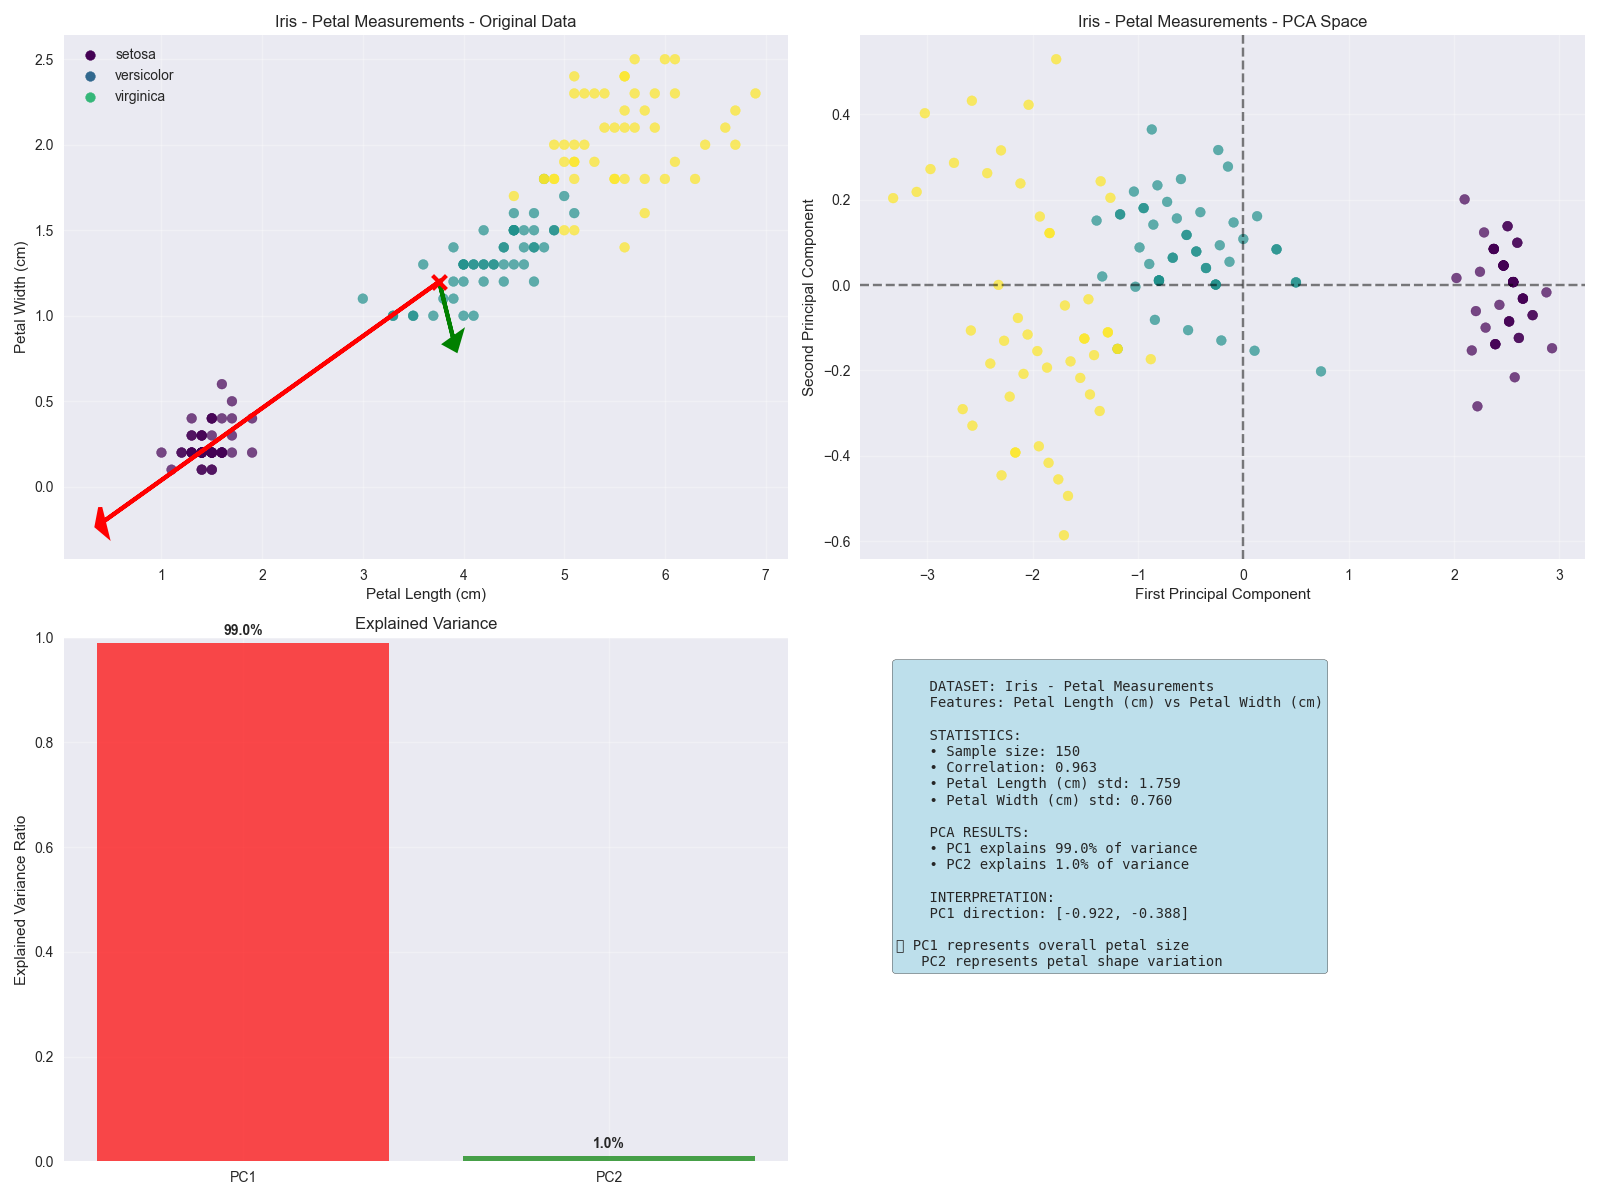

Correlation between Petal Length (cm) and Petal Width (cm): 0.963
PC1 explains 99.0% of the total variance
PC2 explains 1.0% of the total variance
👉 Strong dimensionality reduction possible - PC1 captures most information



ANALYZING: Iris - Sepal Measurements
----------------------------------------
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [5.843, 3.057]
  Centered data mean: [-0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[0.686, -0.042]
     [-0.042, 0.190]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [0.186, 0.689]
  Eigenvector 1: [-0.085, -0.996]
  Eigenvector 2: [-0.996, 0.085]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 0.689
  Second PC (smallest eigenvalue): 0.186

Step 5: Calculate explained variance
  PC1 explains 78.7% of variance
  PC2 explains 21.3% of variance
  Total variance explained: 100.0%


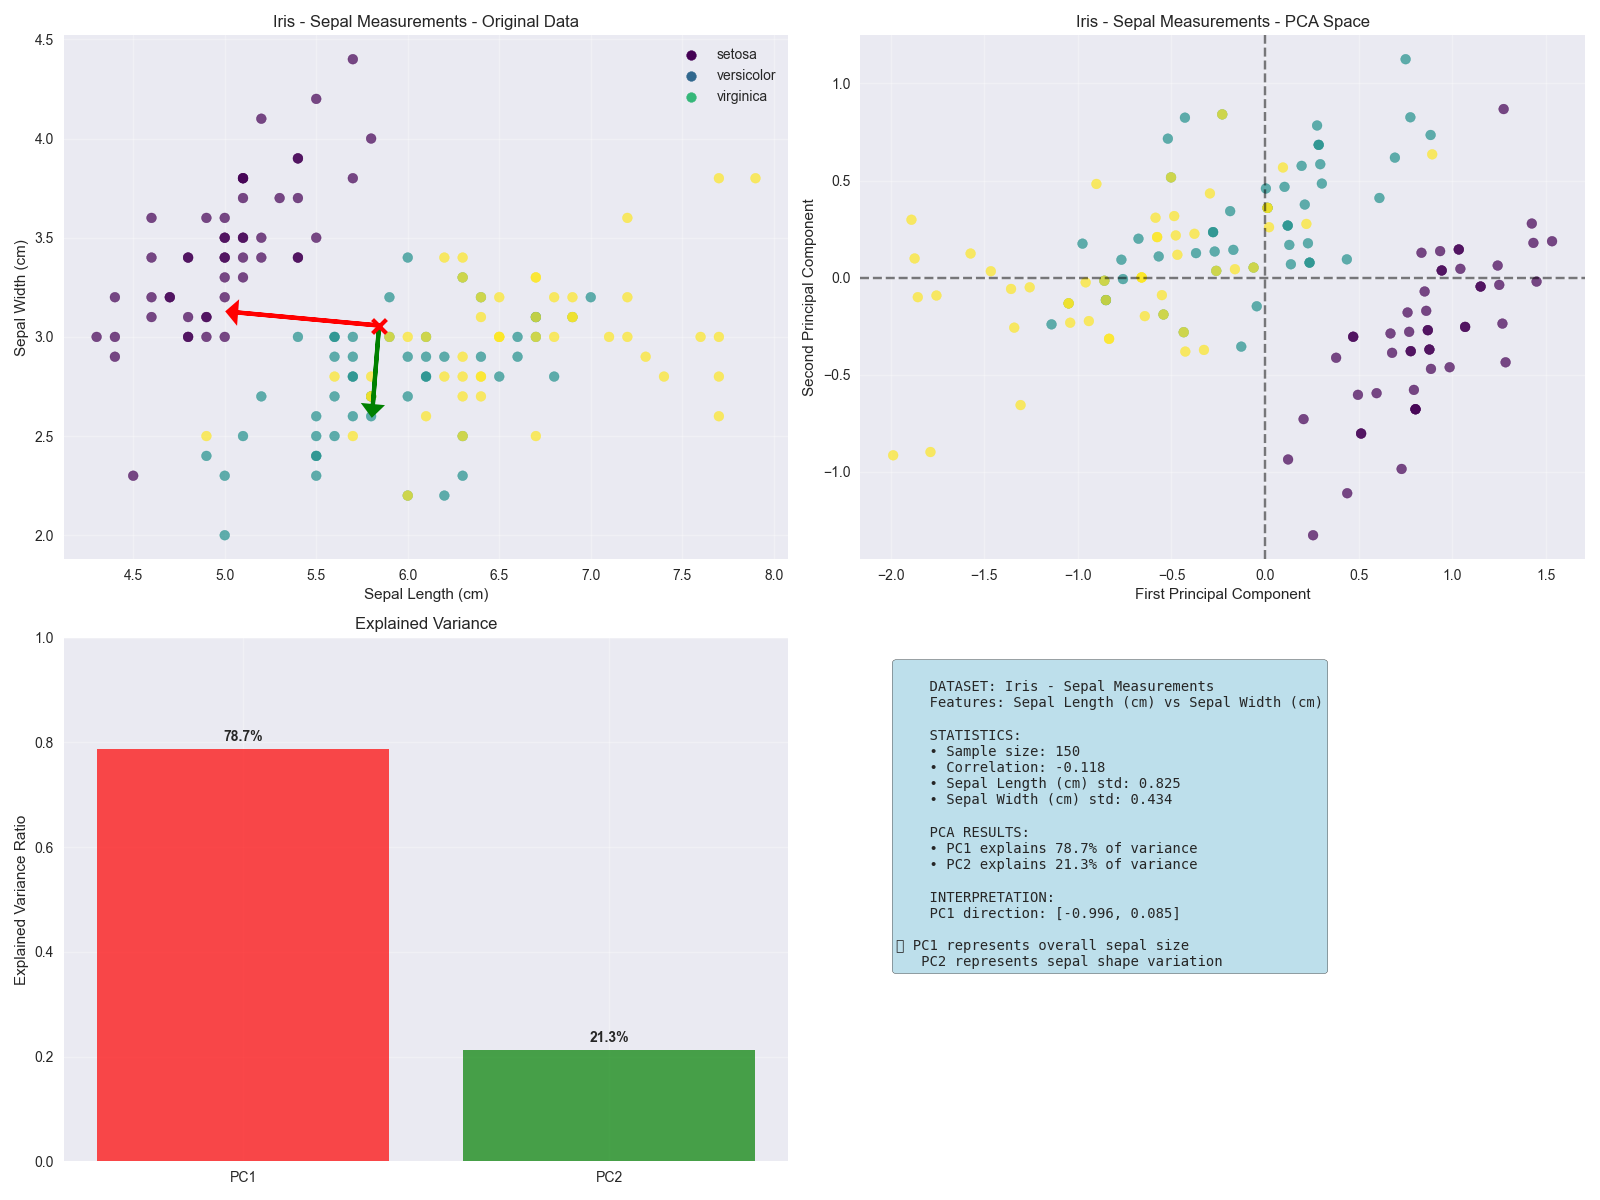

Correlation between Sepal Length (cm) and Sepal Width (cm): -0.118
PC1 explains 78.7% of the total variance
PC2 explains 21.3% of the total variance
👉 Moderate dimensionality reduction - PC1 is dominant but PC2 is important



ANALYZING: Industrial Process Data
----------------------------------------
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [347.961, 871.621]
  Centered data mean: [0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[2166.921, 5504.733]
     [5504.733, 14370.079]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [50.754, 16486.245]
  Eigenvector 1: [-0.933, 0.359]
  Eigenvector 2: [0.359, 0.933]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 16486.245
  Second PC (smallest eigenvalue): 50.754

Step 5: Calculate explained variance
  PC1 explains 99.7% of variance
  PC2 explains 0.3% of variance
  Total variance explained: 100.0%


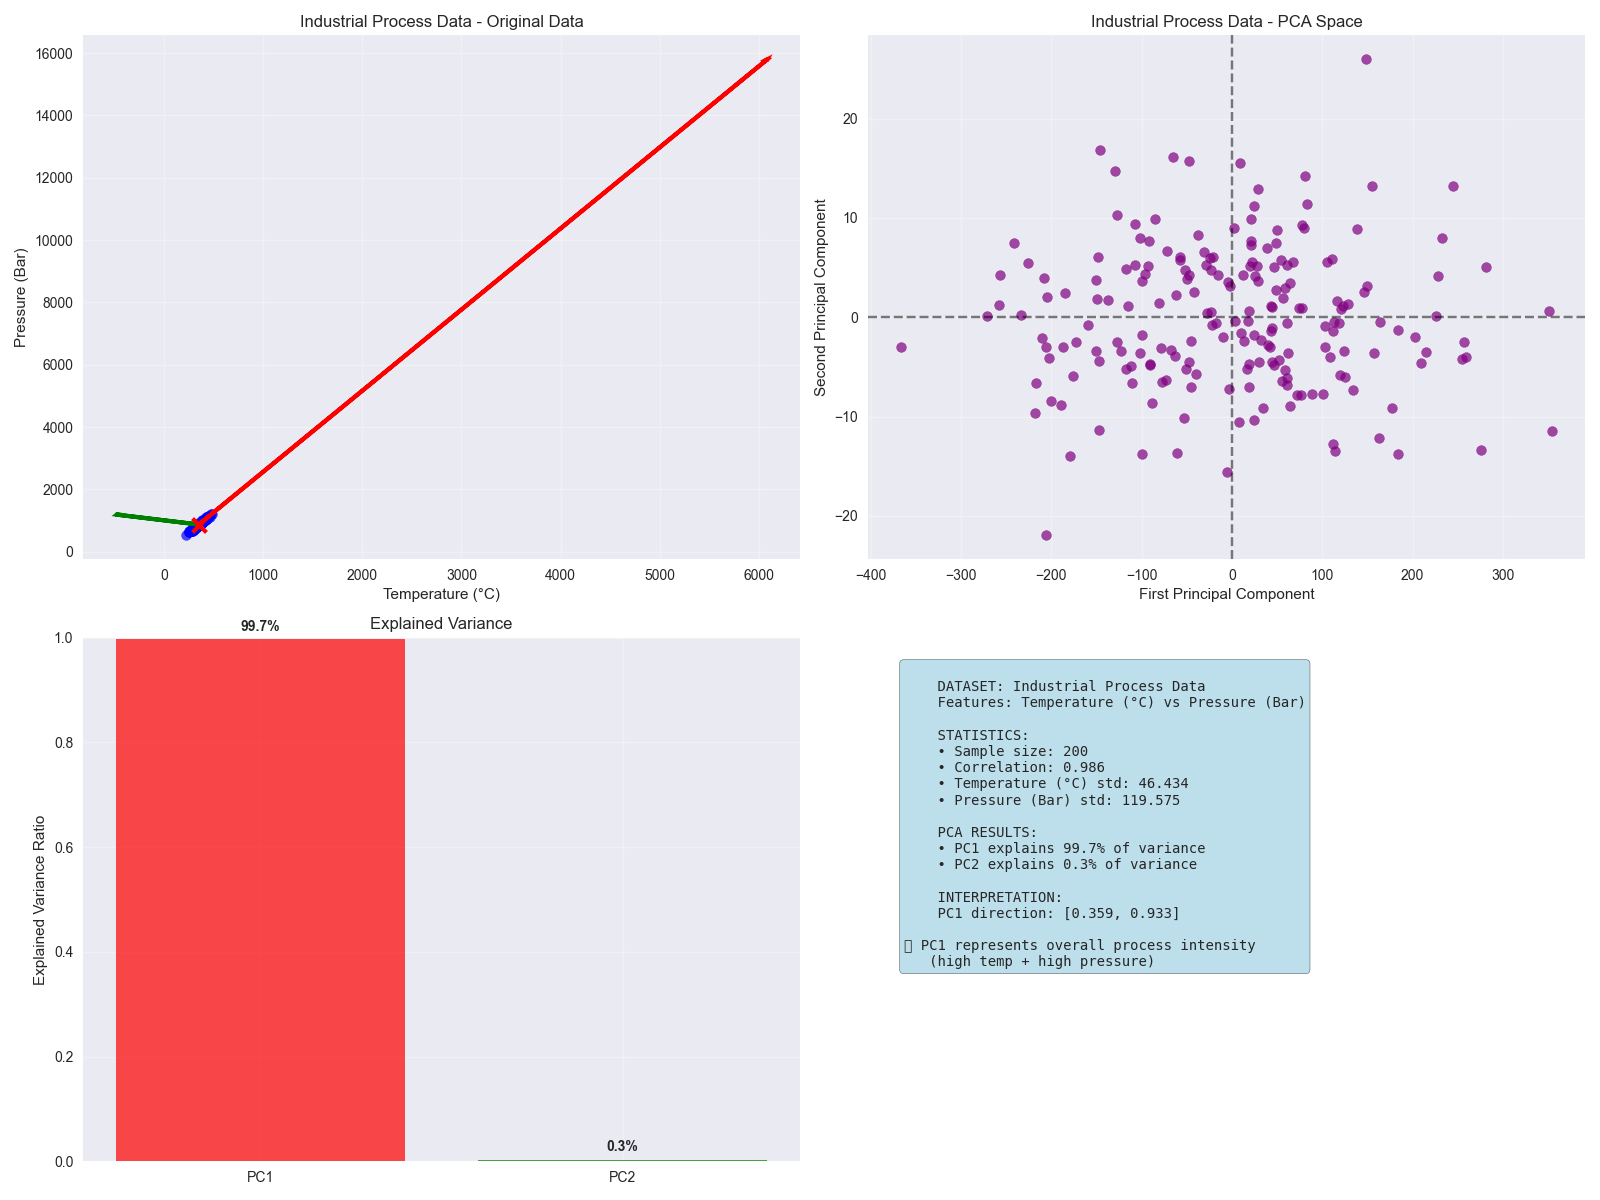

Correlation between Temperature (°C) and Pressure (Bar): 0.986
PC1 explains 99.7% of the total variance
PC2 explains 0.3% of the total variance
👉 Strong dimensionality reduction possible - PC1 captures most information



ANALYZING: Economic Indicators
----------------------------------------
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [2.829, 2.911]
  Centered data mean: [-0.000, 0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[3.952, -2.422]
     [-2.422, 2.367]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [0.612, 5.708]
  Eigenvector 1: [-0.587, -0.810]
  Eigenvector 2: [-0.810, 0.587]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 5.708
  Second PC (smallest eigenvalue): 0.612

Step 5: Calculate explained variance
  PC1 explains 90.3% of variance
  PC2 explains 9.7% of variance
  Total variance explained: 100.0%


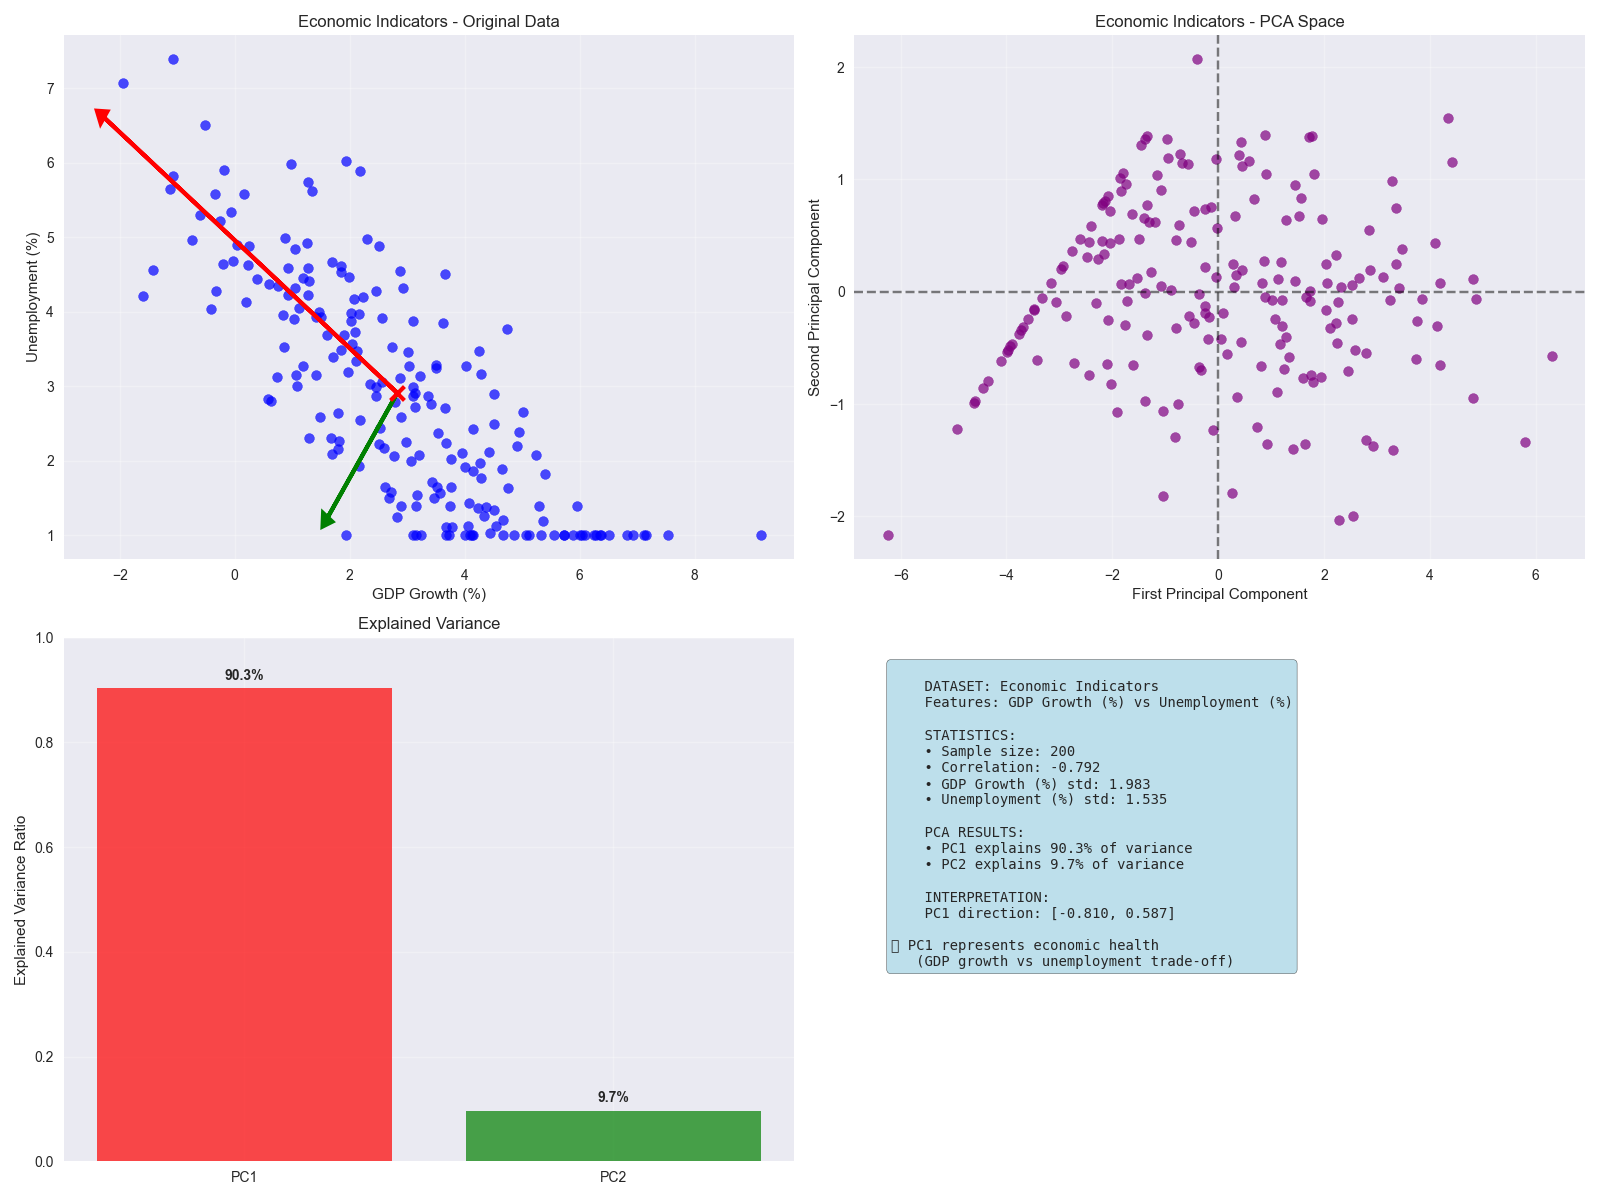

Correlation between GDP Growth (%) and Unemployment (%): -0.792
PC1 explains 90.3% of the total variance
PC2 explains 9.7% of the total variance
👉 Strong dimensionality reduction possible - PC1 captures most information




In [9]:
# Load real datasets for PCA analysis
def analyze_real_datasets():
    """
    Apply PCA to real-world datasets
    """
    print("APPLYING PCA TO REAL DATASETS")
    print("=" * 50)
    
    # 1. Iris dataset - petal measurements
    iris = load_iris()
    iris_data_petal = iris.data[:, 2:4]  # Petal length and width
    iris_data_sepal = iris.data[:, 0:2]  # Sepal length and width
    
    # 2. Create some other interesting real-world-like data
    # Simulated industrial sensor data
    np.random.seed(42)
    n_samples = 200
    
    # Temperature and pressure correlation (industrial process)
    base_temp = np.random.normal(350, 50, n_samples)  # Temperature in Celsius
    pressure = 2.5 * base_temp + np.random.normal(0, 20, n_samples)  # Pressure correlated with temp
    industrial_data = np.column_stack([base_temp, pressure])
    
    # Economic data simulation - GDP vs unemployment (inverse correlation)
    gdp_growth = np.random.normal(3, 2, n_samples)
    unemployment = -0.8 * gdp_growth + 5 + np.random.normal(0, 1, n_samples)
    unemployment = np.clip(unemployment, 1, 15)  # Keep realistic range
    economic_data = np.column_stack([gdp_growth, unemployment])
    
    real_datasets = {
        'Iris - Petal Measurements': {
            'data': iris_data_petal,
            'feature_names': ['Petal Length (cm)', 'Petal Width (cm)'],
            'colors': iris.target,
            'target_names': iris.target_names
        },
        'Iris - Sepal Measurements': {
            'data': iris_data_sepal,
            'feature_names': ['Sepal Length (cm)', 'Sepal Width (cm)'],
            'colors': iris.target,
            'target_names': iris.target_names
        },
        'Industrial Process Data': {
            'data': industrial_data,
            'feature_names': ['Temperature (°C)', 'Pressure (Bar)'],
            'colors': None,
            'target_names': None
        },
        'Economic Indicators': {
            'data': economic_data,
            'feature_names': ['GDP Growth (%)', 'Unemployment (%)'],
            'colors': None,
            'target_names': None
        }
    }
    
    return real_datasets

def plot_real_dataset_pca(dataset_name, dataset_info):
    """
    Plot PCA analysis for real datasets
    """
    data = dataset_info['data']
    feature_names = dataset_info['feature_names']
    colors = dataset_info['colors']
    target_names = dataset_info['target_names']
    
    print(f"\nANALYZING: {dataset_name}")
    print("-" * 40)
    
    # Apply PCA
    pca = PCA2D()
    pca.fit(data)
    transformed_data = pca.transform(data)
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))
    
    # 1. Original data
    if colors is not None:
        scatter = ax1.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.7, s=50, cmap='viridis')
        if target_names is not None:
            # Create legend
            for i, name in enumerate(target_names):
                ax1.scatter([], [], c=plt.cm.viridis(i / len(target_names)), label=name)
            ax1.legend()
    else:
        ax1.scatter(data[:, 0], data[:, 1], alpha=0.7, s=50, color='blue')
    
    # Plot principal components
    mean_point = pca.mean_
    ax1.scatter(mean_point[0], mean_point[1], color='red', s=100, marker='x', 
               linewidth=3, zorder=5)
    
    # Scale arrows appropriately for the data range
    data_std = np.std(data, axis=0)
    scale_factor = np.mean(data_std) * 1.5
    
    pc1_arrow = pca.eigenvectors_[:, 0] * np.sqrt(pca.eigenvalues_[0]) * scale_factor
    pc2_arrow = pca.eigenvectors_[:, 1] * np.sqrt(pca.eigenvalues_[1]) * scale_factor
    
    ax1.arrow(mean_point[0], mean_point[1], pc1_arrow[0], pc1_arrow[1],
              head_width=data_std[0]*0.1, head_length=data_std[1]*0.1, 
              fc='red', ec='red', linewidth=3, zorder=4)
    ax1.arrow(mean_point[0], mean_point[1], pc2_arrow[0], pc2_arrow[1],
              head_width=data_std[0]*0.1, head_length=data_std[1]*0.1, 
              fc='green', ec='green', linewidth=3, zorder=4)
    
    ax1.set_xlabel(feature_names[0])
    ax1.set_ylabel(feature_names[1])
    ax1.set_title(f'{dataset_name} - Original Data')
    ax1.grid(True, alpha=0.3)
    
    # 2. Transformed data
    if colors is not None:
        ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], c=colors, 
                   alpha=0.7, s=50, cmap='viridis')
    else:
        ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], 
                   alpha=0.7, s=50, color='purple')
    
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax2.set_xlabel('First Principal Component')
    ax2.set_ylabel('Second Principal Component')
    ax2.set_title(f'{dataset_name} - PCA Space')
    ax2.grid(True, alpha=0.3)
    
    # 3. Explained variance
    variance_ratios = pca.explained_variance_ratio_
    components = ['PC1', 'PC2']
    bars = ax3.bar(components, variance_ratios, color=['red', 'green'], alpha=0.7)
    ax3.set_ylabel('Explained Variance Ratio')
    ax3.set_title('Explained Variance')
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(0, 1)
    
    for bar, ratio in zip(bars, variance_ratios):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{ratio:.1%}', ha='center', va='bottom', fontweight='bold')
    
    # 4. Interpretation and statistics
    ax4.axis('off')
    
    # Calculate correlation
    correlation = np.corrcoef(data[:, 0], data[:, 1])[0, 1]
    
    interpretation_text = f"""
    DATASET: {dataset_name}
    Features: {feature_names[0]} vs {feature_names[1]}
    
    STATISTICS:
    • Sample size: {data.shape[0]}
    • Correlation: {correlation:.3f}
    • {feature_names[0]} std: {np.std(data[:, 0]):.3f}
    • {feature_names[1]} std: {np.std(data[:, 1]):.3f}
    
    PCA RESULTS:
    • PC1 explains {variance_ratios[0]:.1%} of variance
    • PC2 explains {variance_ratios[1]:.1%} of variance
    
    INTERPRETATION:
    PC1 direction: [{pca.eigenvectors_[0, 0]:.3f}, {pca.eigenvectors_[1, 0]:.3f}]
    """
    
    # Add domain-specific interpretation
    if 'Petal' in dataset_name:
        interpretation_text += "\n🌺 PC1 represents overall petal size"
        interpretation_text += "\n   PC2 represents petal shape variation"
    elif 'Sepal' in dataset_name:
        interpretation_text += "\n🌿 PC1 represents overall sepal size"
        interpretation_text += "\n   PC2 represents sepal shape variation"
    elif 'Industrial' in dataset_name:
        interpretation_text += "\n🏭 PC1 represents overall process intensity"
        interpretation_text += "\n   (high temp + high pressure)"
    elif 'Economic' in dataset_name:
        interpretation_text += "\n📊 PC1 represents economic health"
        interpretation_text += "\n   (GDP growth vs unemployment trade-off)"
    
    ax4.text(0.05, 0.95, interpretation_text, transform=ax4.transAxes,
            fontsize=10, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"Correlation between {feature_names[0]} and {feature_names[1]}: {correlation:.3f}")
    print(f"PC1 explains {variance_ratios[0]:.1%} of the total variance")
    print(f"PC2 explains {variance_ratios[1]:.1%} of the total variance")
    
    if variance_ratios[0] > 0.8:
        print("👉 Strong dimensionality reduction possible - PC1 captures most information")
    elif variance_ratios[0] > 0.6:
        print("👉 Moderate dimensionality reduction - PC1 is dominant but PC2 is important")
    else:
        print("👉 Both components are important - limited dimensionality reduction")

# Load and analyze real datasets
real_datasets = analyze_real_datasets()

print(f"Loaded {len(real_datasets)} real-world datasets for PCA analysis:")
for name in real_datasets.keys():
    print(f"  • {name}")

# Analyze each dataset
for dataset_name, dataset_info in real_datasets.items():
    plot_real_dataset_pca(dataset_name, dataset_info)
    print("\n" + "="*60 + "\n")

## 8. Demonstrate Dimensionality Reduction Effects

Let's explore how projecting 2D data onto just the first principal component reduces dimensionality while preserving maximum variance, and visualize the reconstruction error.

COMPREHENSIVE DIMENSIONALITY REDUCTION DEMONSTRATION
DIMENSIONALITY REDUCTION DEMONSTRATION - Highly Correlated
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [0.025, 0.014]
  Centered data mean: [-0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[0.990, 0.870]
     [0.870, 0.962]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [0.106, 1.846]
  Eigenvector 1: [0.701, -0.713]
  Eigenvector 2: [-0.713, -0.701]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 1.846
  Second PC (smallest eigenvalue): 0.106

Step 5: Calculate explained variance
  PC1 explains 94.6% of variance
  PC2 explains 5.4% of variance
  Total variance explained: 100.0%
Original data shape: (300, 2)
Reduced data would be: (300, 1) - 50% size reduction
Information retained: 94.6%
Information lost: 5.4%
Reconstruction error (2D): 0.000000
Reconstruction error (1D): 0.105803


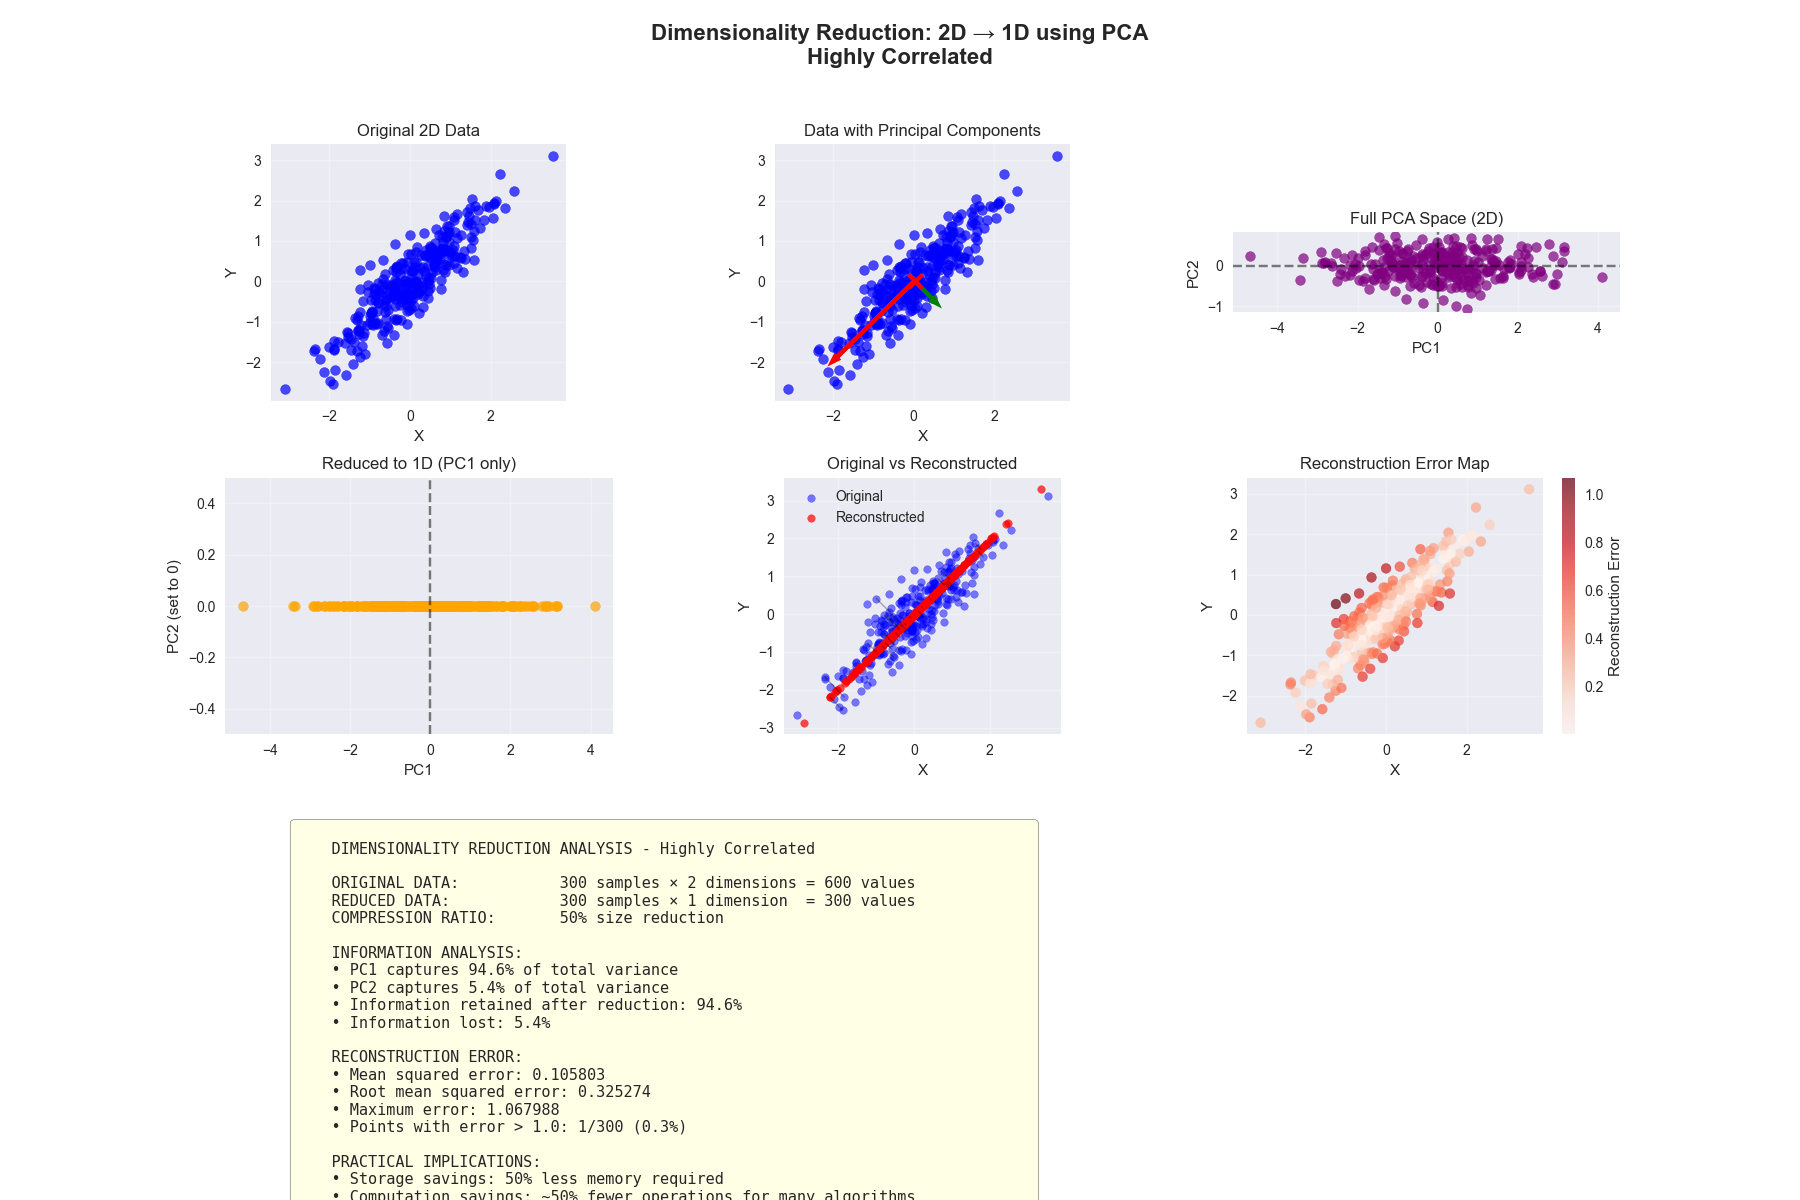



DIMENSIONALITY REDUCTION DEMONSTRATION - Circular Pattern
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [0.004, 0.038]
  Centered data mean: [-0.000, -0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[2.092, -0.084]
     [-0.084, 2.157]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [2.035, 2.214]
  Eigenvector 1: [-0.825, -0.565]
  Eigenvector 2: [-0.565, 0.825]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 2.214
  Second PC (smallest eigenvalue): 2.035

Step 5: Calculate explained variance
  PC1 explains 52.1% of variance
  PC2 explains 47.9% of variance
  Total variance explained: 100.0%
Original data shape: (300, 2)
Reduced data would be: (300, 1) - 50% size reduction
Information retained: 52.1%
Information lost: 47.9%
Reconstruction error (2D): 0.000000
Reconstruction error (1D): 2.027873


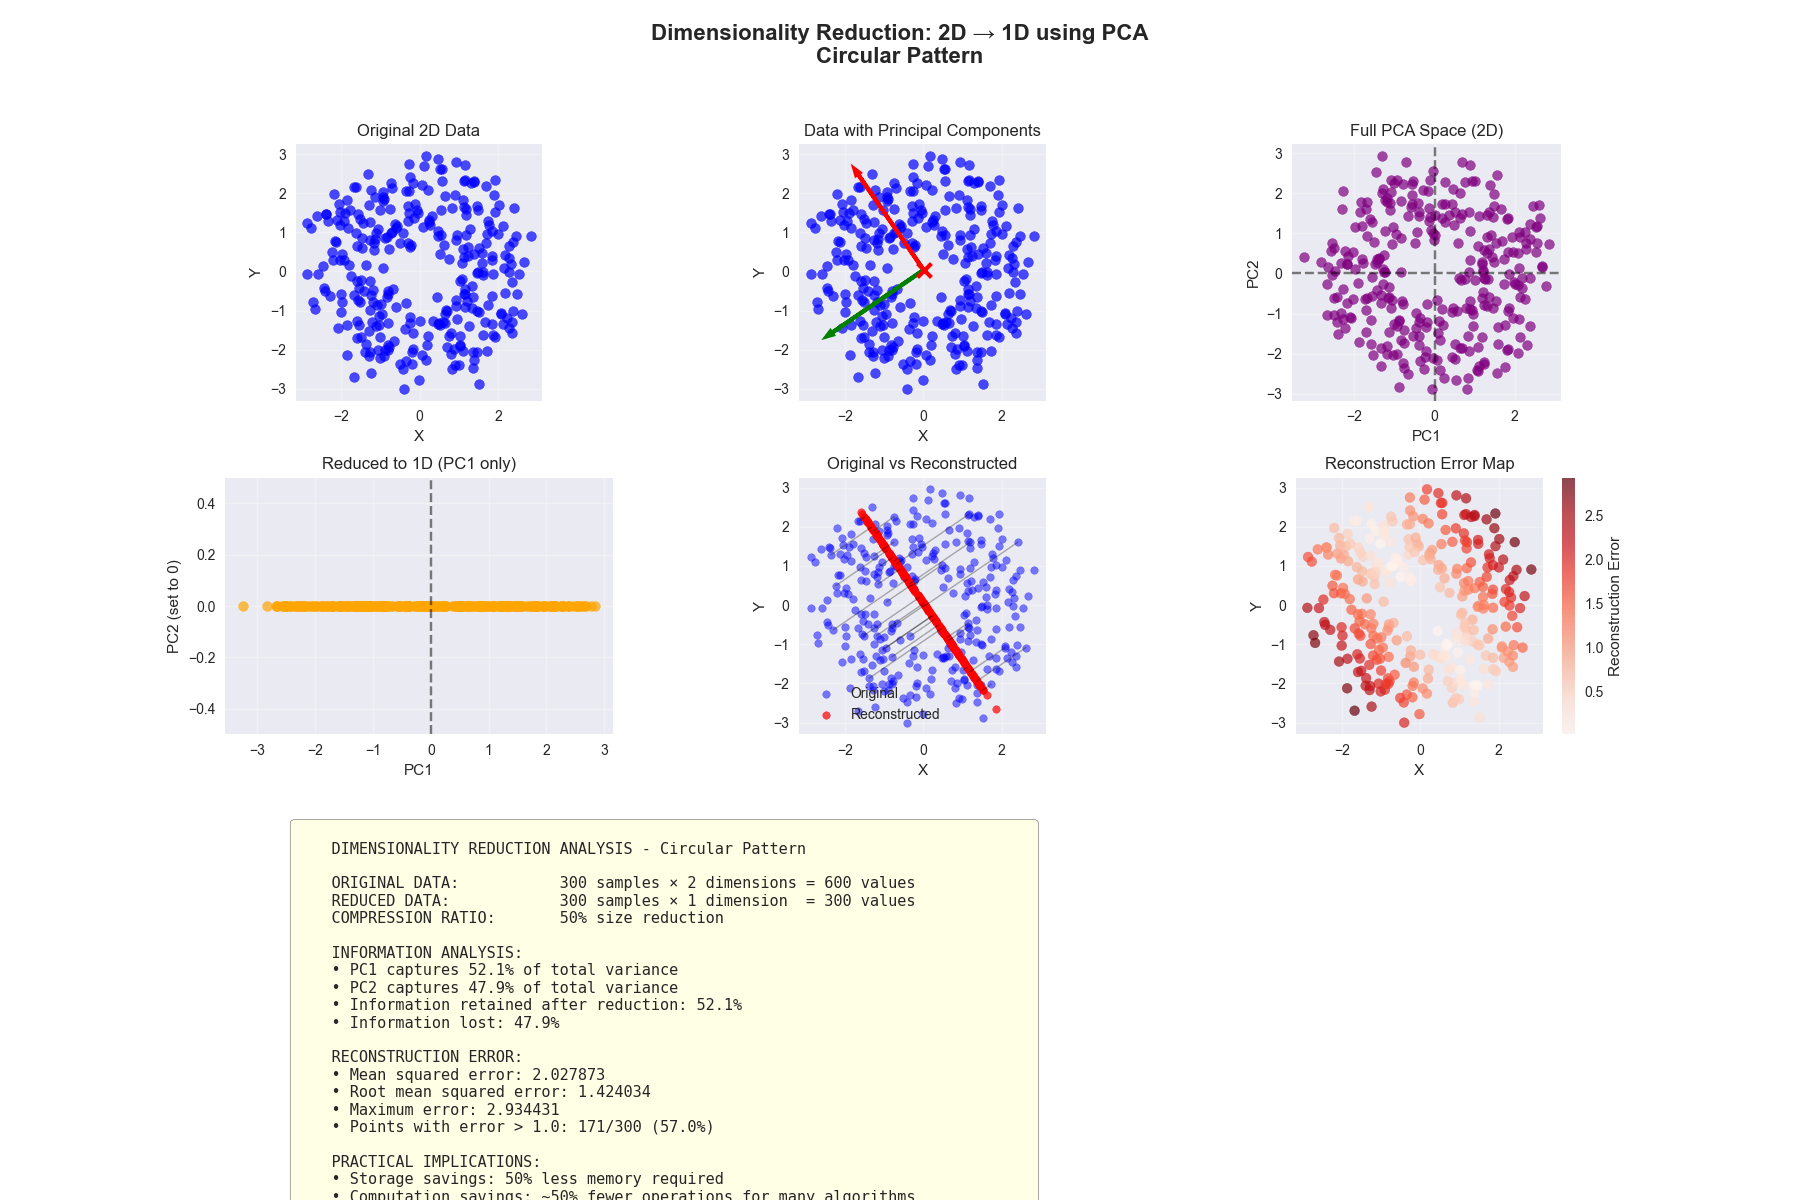



DIMENSIONALITY REDUCTION DEMONSTRATION - Uncorrelated (Different Variances)
STEP-BY-STEP PCA COMPUTATION
Step 1: Center the data
  Original data mean: [-0.095, -0.042]
  Centered data mean: [-0.000, 0.000]

Step 2: Compute covariance matrix
  Covariance matrix:
    [[1.013, 0.054]
     [0.054, 3.556]]

Step 3: Compute eigenvalues and eigenvectors
  Eigenvalues: [1.012, 3.557]
  Eigenvector 1: [-1.000, 0.021]
  Eigenvector 2: [0.021, 1.000]

Step 4: Sort by eigenvalues (descending)
  First PC (largest eigenvalue): 3.557
  Second PC (smallest eigenvalue): 1.012

Step 5: Calculate explained variance
  PC1 explains 77.9% of variance
  PC2 explains 22.1% of variance
  Total variance explained: 100.0%
Original data shape: (300, 2)
Reduced data would be: (300, 1) - 50% size reduction
Information retained: 77.9%
Information lost: 22.1%
Reconstruction error (2D): 0.000000
Reconstruction error (1D): 1.008170


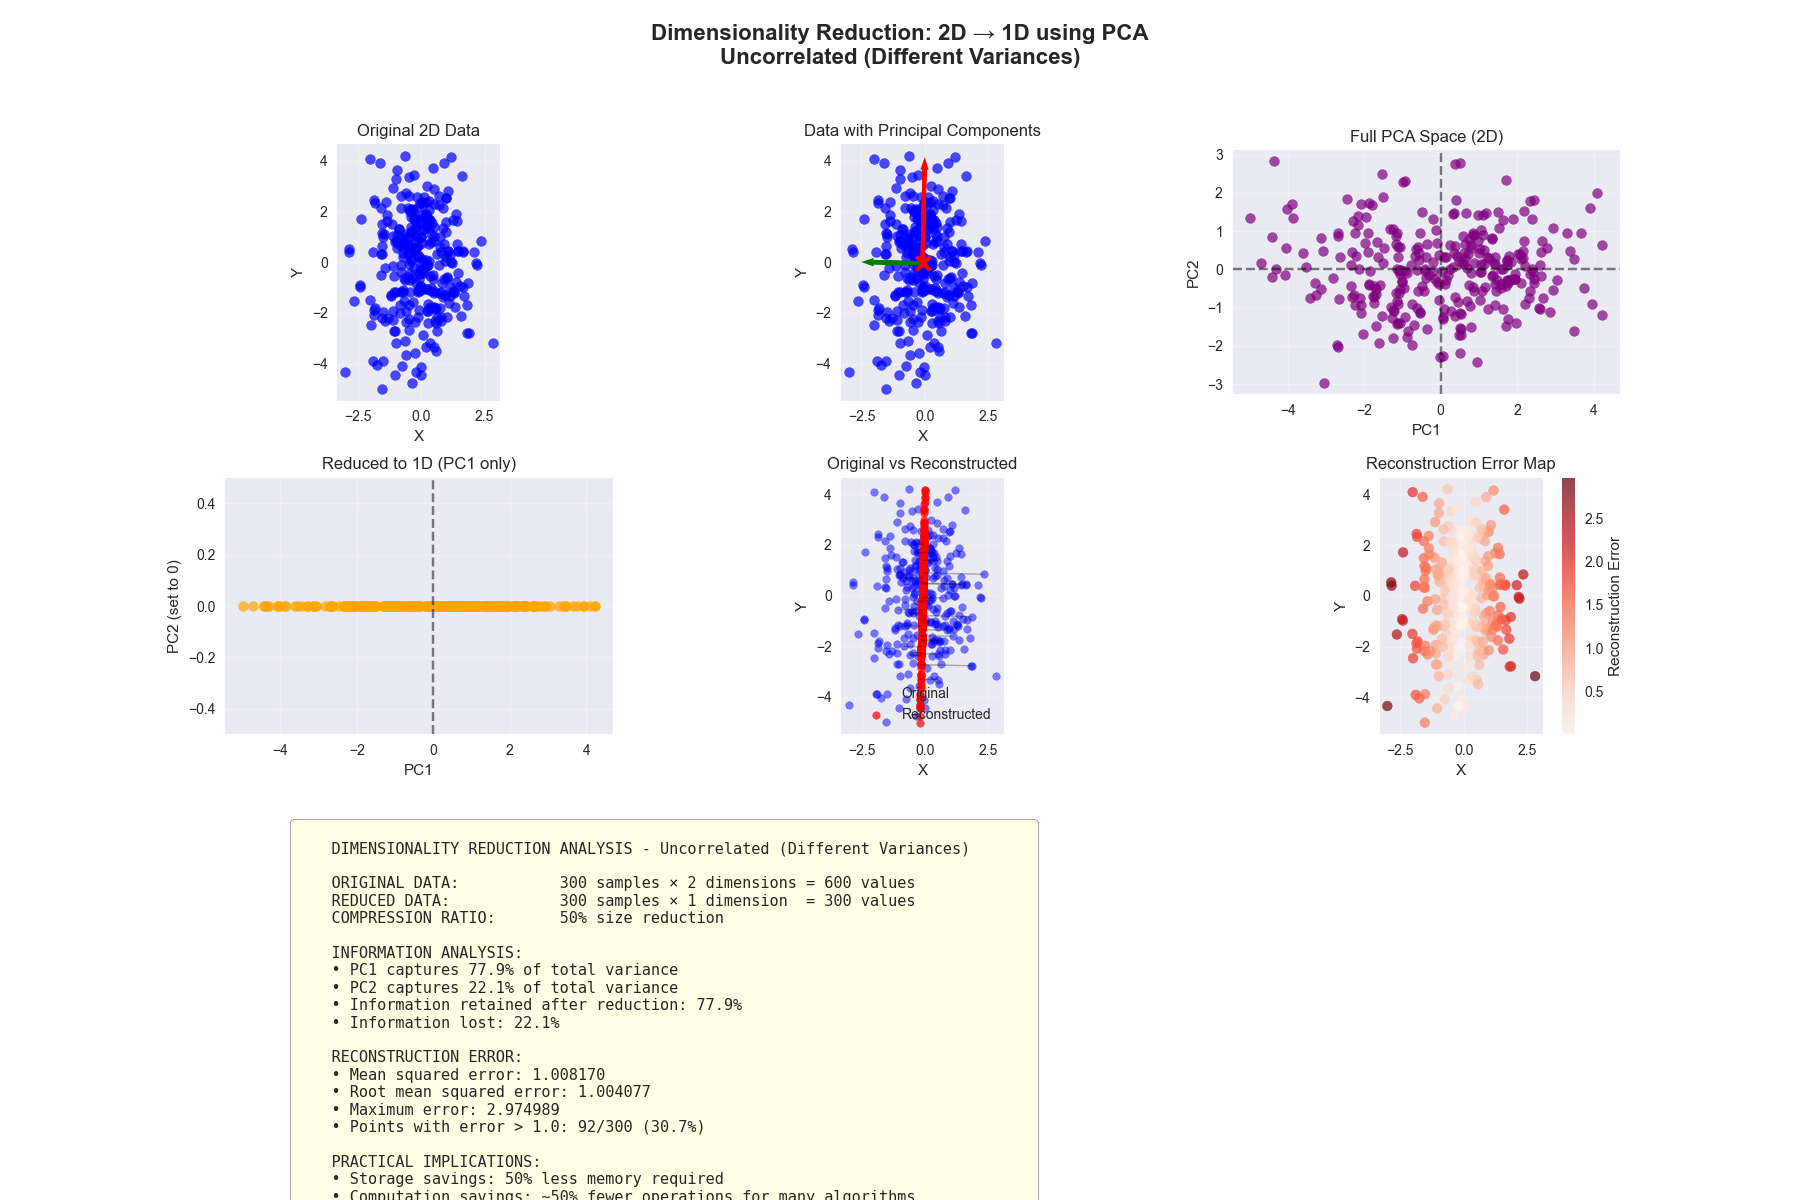



DIMENSIONALITY REDUCTION SUMMARY


Dataset  Variance Retained  \
0                   Highly Correlated           0.945614   
1                    Circular Pattern           0.521141   
2  Uncorrelated (Different Variances)           0.778582   

   Reconstruction Error  Compression Ratio  
0              0.105803                0.5  
1              2.027873                0.5  
2              1.008170                0.5


KEY INSIGHTS:
🔍 Highly correlated data → Low reconstruction error, high variance retained
🔍 Uncorrelated data → Higher reconstruction error, but still decent compression
🔍 Circular/complex patterns → May not be suitable for linear PCA reduction
🔍 Best candidates for reduction: data with strong linear correlations

✅ PCA 2D demonstration complete!
🎯 You now understand how PCA finds principal components and reduces dimensionality!


In [10]:
def demonstrate_dimensionality_reduction(data, dataset_name):
    """
    Show the effects of reducing 2D data to 1D using PCA
    """
    print(f"DIMENSIONALITY REDUCTION DEMONSTRATION - {dataset_name}")
    print("=" * 60)
    
    # Fit PCA
    pca = PCA2D()
    pca.fit(data)
    
    # Full transformation (2D -> 2D)
    data_2d_transformed = pca.transform(data)
    data_2d_reconstructed = pca.inverse_transform(data_2d_transformed)
    
    # Dimension reduction (2D -> 1D -> 2D)
    # Project only onto first principal component
    data_1d_transformed = data_2d_transformed.copy()
    data_1d_transformed[:, 1] = 0  # Set second component to zero
    data_1d_reconstructed = pca.inverse_transform(data_1d_transformed)
    
    # Calculate reconstruction errors
    error_2d = np.mean(np.sum((data - data_2d_reconstructed)**2, axis=1))
    error_1d = np.mean(np.sum((data - data_1d_reconstructed)**2, axis=1))
    
    # Calculate information retention
    variance_retained = pca.explained_variance_ratio_[0]
    information_lost = 1 - variance_retained
    
    print(f"Original data shape: {data.shape}")
    print(f"Reduced data would be: ({data.shape[0]}, 1) - {50}% size reduction")
    print(f"Information retained: {variance_retained:.1%}")
    print(f"Information lost: {information_lost:.1%}")
    print(f"Reconstruction error (2D): {error_2d:.6f}")
    print(f"Reconstruction error (1D): {error_1d:.6f}")
    
    # Create comprehensive visualization
    fig = plt.figure(figsize=(9, 6))
    
    # Create a grid layout
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. Original data
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.scatter(data[:, 0], data[:, 1], alpha=0.7, s=50, color='blue')
    ax1.set_title('Original 2D Data')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    
    # 2. Data with PCA components
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.scatter(data[:, 0], data[:, 1], alpha=0.7, s=50, color='blue')
    
    # Plot PCA components
    mean_point = pca.mean_
    ax2.scatter(mean_point[0], mean_point[1], color='red', s=100, marker='x', 
               linewidth=3, zorder=5)
    
    scale_factor = 2
    pc1_arrow = pca.eigenvectors_[:, 0] * np.sqrt(pca.eigenvalues_[0]) * scale_factor
    pc2_arrow = pca.eigenvectors_[:, 1] * np.sqrt(pca.eigenvalues_[1]) * scale_factor
    
    ax2.arrow(mean_point[0], mean_point[1], pc1_arrow[0], pc1_arrow[1],
              head_width=0.1, head_length=0.15, fc='red', ec='red', linewidth=3)
    ax2.arrow(mean_point[0], mean_point[1], pc2_arrow[0], pc2_arrow[1],
              head_width=0.1, head_length=0.15, fc='green', ec='green', linewidth=3)
    
    ax2.set_title('Data with Principal Components')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.grid(True, alpha=0.3)
    ax2.set_aspect('equal')
    
    # 3. Full PCA transformation (2D -> 2D)
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.scatter(data_2d_transformed[:, 0], data_2d_transformed[:, 1], 
               alpha=0.7, s=50, color='purple')
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax3.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax3.set_title('Full PCA Space (2D)')
    ax3.set_xlabel('PC1')
    ax3.set_ylabel('PC2')
    ax3.grid(True, alpha=0.3)
    ax3.set_aspect('equal')
    
    # 4. Dimensionality reduction (2D -> 1D)
    ax4 = fig.add_subplot(gs[1, 0])
    ax4.scatter(data_1d_transformed[:, 0], np.zeros_like(data_1d_transformed[:, 0]), 
               alpha=0.7, s=50, color='orange')
    ax4.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    ax4.set_title('Reduced to 1D (PC1 only)')
    ax4.set_xlabel('PC1')
    ax4.set_ylabel('PC2 (set to 0)')
    ax4.set_ylim(-0.5, 0.5)
    ax4.grid(True, alpha=0.3)
    
    # 5. Reconstructed from 1D
    ax5 = fig.add_subplot(gs[1, 1])
    ax5.scatter(data[:, 0], data[:, 1], alpha=0.5, s=30, color='blue', label='Original')
    ax5.scatter(data_1d_reconstructed[:, 0], data_1d_reconstructed[:, 1], 
               alpha=0.7, s=30, color='red', label='Reconstructed')
    
    # Draw lines showing reconstruction error
    for i in range(0, len(data), 10):  # Show every 10th point for clarity
        ax5.plot([data[i, 0], data_1d_reconstructed[i, 0]], 
                [data[i, 1], data_1d_reconstructed[i, 1]], 
                'k-', alpha=0.3, linewidth=1)
    
    ax5.set_title('Original vs Reconstructed')
    ax5.set_xlabel('X')
    ax5.set_ylabel('Y')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    ax5.set_aspect('equal')
    
    # 6. Error visualization
    ax6 = fig.add_subplot(gs[1, 2])
    errors = np.sqrt(np.sum((data - data_1d_reconstructed)**2, axis=1))
    scatter = ax6.scatter(data[:, 0], data[:, 1], c=errors, s=50, 
                         cmap='Reds', alpha=0.7)
    plt.colorbar(scatter, ax=ax6, label='Reconstruction Error')
    ax6.set_title('Reconstruction Error Map')
    ax6.set_xlabel('X')
    ax6.set_ylabel('Y')
    ax6.grid(True, alpha=0.3)
    ax6.set_aspect('equal')
    
    # 7. Error statistics
    ax7 = fig.add_subplot(gs[2, :])
    ax7.axis('off')
    
    stats_text = f"""
    DIMENSIONALITY REDUCTION ANALYSIS - {dataset_name}
    
    ORIGINAL DATA:           {data.shape[0]} samples × 2 dimensions = {data.shape[0] * 2} values
    REDUCED DATA:            {data.shape[0]} samples × 1 dimension  = {data.shape[0]} values
    COMPRESSION RATIO:       50% size reduction
    
    INFORMATION ANALYSIS:
    • PC1 captures {pca.explained_variance_ratio_[0]:.1%} of total variance
    • PC2 captures {pca.explained_variance_ratio_[1]:.1%} of total variance
    • Information retained after reduction: {variance_retained:.1%}
    • Information lost: {information_lost:.1%}
    
    RECONSTRUCTION ERROR:
    • Mean squared error: {error_1d:.6f}
    • Root mean squared error: {np.sqrt(error_1d):.6f}
    • Maximum error: {np.max(errors):.6f}
    • Points with error > 1.0: {np.sum(errors > 1.0)}/{len(errors)} ({100*np.sum(errors > 1.0)/len(errors):.1f}%)
    
    PRACTICAL IMPLICATIONS:
    • Storage savings: 50% less memory required
    • Computation savings: ~50% fewer operations for many algorithms
    • Visualization: Can plot 1D data as histogram or line plot
    • Noise reduction: Removing PC2 can eliminate noise if it's in that direction
    """
    
    ax7.text(0.05, 0.95, stats_text, transform=ax7.transAxes, fontsize=11,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))
    
    plt.suptitle(f'Dimensionality Reduction: 2D → 1D using PCA\n{dataset_name}', 
                fontsize=16, fontweight='bold')
    plt.show()
    
    return {
        'original_data': data,
        'reduced_data': data_1d_transformed[:, 0],  # Just the 1D values
        'reconstructed_data': data_1d_reconstructed,
        'reconstruction_error': error_1d,
        'variance_retained': variance_retained,
        'compression_ratio': 0.5
    }

# Demonstrate dimensionality reduction on different datasets
print("COMPREHENSIVE DIMENSIONALITY REDUCTION DEMONSTRATION")
print("=" * 70)

# Test on synthetic datasets
demo_datasets = {
    'Highly Correlated': datasets['Highly Correlated'],
    'Circular Pattern': datasets['Circular Pattern'],
    'Uncorrelated (Different Variances)': datasets['Uncorrelated (Different Variances)']
}

reduction_results = {}

for name, data in demo_datasets.items():
    result = demonstrate_dimensionality_reduction(data, name)
    reduction_results[name] = result
    print("\n" + "="*70 + "\n")

# Summary comparison
print("DIMENSIONALITY REDUCTION SUMMARY")
print("=" * 50)

comparison_df = pd.DataFrame({
    'Dataset': list(reduction_results.keys()),
    'Variance Retained': [r['variance_retained'] for r in reduction_results.values()],
    'Reconstruction Error': [r['reconstruction_error'] for r in reduction_results.values()],
    'Compression Ratio': [r['compression_ratio'] for r in reduction_results.values()]
})

display(comparison_df)

print("\nKEY INSIGHTS:")
print("🔍 Highly correlated data → Low reconstruction error, high variance retained")
print("🔍 Uncorrelated data → Higher reconstruction error, but still decent compression")
print("🔍 Circular/complex patterns → May not be suitable for linear PCA reduction")
print("🔍 Best candidates for reduction: data with strong linear correlations")

print("\n✅ PCA 2D demonstration complete!")
print("🎯 You now understand how PCA finds principal components and reduces dimensionality!")

## 🎯 Key Takeaways and Understanding PCA

### **What We've Learned About PCA:**

#### **🔍 Mathematical Understanding:**
- **Principal Components**: Are the directions of maximum variance in the data
- **Eigenvectors**: Define the directions of principal components
- **Eigenvalues**: Represent the amount of variance along each principal component
- **Orthogonality**: Principal components are always perpendicular to each other

#### **🎯 PCA Process (Step-by-Step):**
1. **Center the data**: Subtract the mean from each data point
2. **Compute covariance matrix**: Shows how variables vary together
3. **Find eigenvalues/eigenvectors**: Mathematical recipe for principal directions
4. **Sort by importance**: Largest eigenvalue = most important direction
5. **Transform data**: Project original data onto new coordinate system

#### **📊 When PCA Works Best:**
- **Linear correlations**: Strong linear relationships between variables
- **High-dimensional data**: More effective with more dimensions
- **Continuous variables**: Works best with numerical data
- **Normalized data**: Variables should be on similar scales

#### **⚠️ When PCA May Not Work Well:**
- **Non-linear relationships**: PCA only captures linear patterns
- **Circular/curved patterns**: Linear projections may not be meaningful
- **Categorical data**: PCA is designed for continuous variables
- **Equal variance in all directions**: No dimensionality reduction possible

### **Practical Applications:**

#### **🏭 Industrial Control Systems:**
- **Sensor fusion**: Combine multiple sensor readings into principal components
- **Process monitoring**: Detect abnormal patterns in multivariate process data
- **Quality control**: Reduce measurement dimensions while preserving quality information
- **Fault detection**: Use PCA to identify when systems deviate from normal operation

#### **📈 Data Analysis:**
- **Dimensionality reduction**: Reduce storage and computation requirements
- **Noise reduction**: Lower-importance components often contain noise
- **Visualization**: Project high-dimensional data to 2D/3D for plotting
- **Feature engineering**: Create new features that capture most variance

### **Key Insights from Our Experiments:**

#### **🔬 Correlation Impact:**
- High correlation (>0.8) → PC1 dominates, excellent dimensionality reduction
- Medium correlation (0.4-0.7) → Both components important, moderate reduction
- Low correlation (<0.3) → Limited reduction potential, both components needed

#### **📐 Geometric Interpretation:**
- PC1 arrow points in direction of maximum data spread
- PC2 arrow is perpendicular and points in second-largest spread direction
- Arrow length represents importance (square root of eigenvalue)

#### **💾 Information Trade-offs:**
- Keeping PC1 only: 50% storage reduction, but some information loss
- Information retained = PC1's explained variance ratio
- Reconstruction error quantifies information loss

### **Extension to Higher Dimensions:**

The concepts we learned with 2D data extend directly to higher dimensions:
- **3D data**: 3 principal components (PC1, PC2, PC3)
- **High-D data**: As many PCs as dimensions, but typically few dominate
- **Dimensionality reduction**: Keep only the most important components
- **Visualization**: Project high-D data to 2D using first 2 PCs

### **Best Practices:**

1. **Always center your data** before applying PCA
2. **Scale variables** if they have different units/ranges
3. **Check explained variance** to decide how many components to keep
4. **Visualize results** to ensure PCA makes sense for your data
5. **Validate reconstructions** to understand information loss

### **Next Steps:**

- **Try PCA on your own datasets** using the tools from this notebook
- **Experiment with different data patterns** using the interactive explorer
- **Learn about advanced techniques**: Kernel PCA, Sparse PCA, Incremental PCA
- **Apply to real problems**: Image compression, face recognition, genomics

---

**This tutorial provided a complete foundation for understanding PCA through 2D visualizations. The mathematical concepts, geometric intuition, and practical applications you learned here form the basis for using PCA effectively in real-world data analysis and industrial applications.**